<a href="https://colab.research.google.com/github/GetupArjun/arjunEDA/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



##### **Project Type**    - Machine Learning Classification
##### **Contribution**    - Individual
##### **Name**            - Arjun Kumar

# **Project Summary -**

The mobile phone industry is highly competitive, and the price of a mobile phone is determined by various factors, including battery power, Bluetooth, camera quality, screen size, and more. In this context, a study was conducted to understand the factors influencing the price range of mobile phones. The study used a dataset containing around 21 variables to predict the price range of mobile phones, categorized as low, medium, high, and very high.

The first step in the analysis involved DATA WRANGLING, where missing values were handled and unique values were checked. The study identified that 180 phones had pixel resolution height as 0 and two phones had screen width in cm as 0. The minimum value of px height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, the study replaced these 0 values with the mean values, ensuring that no missing values were left in the dataset

Next, the study performed EXPLORATORY DATA ANALYSIS (EDA), which revealed that all category phones were distributed with equal price range. The analysis also indicated that battery capacity was positively correlated with the price range of mobile phones, and the distribution of battery capacity gradually increased with the price range. This suggested that consumers may be willing to pay more for a mobile phone with a higher battery capacity. The study found that almost half the devices had Bluetooth, and half did not

The scatter plot showed a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This indicated that as the price range increased, the amount of RAM in the device generally increased as well. The study also found that the count of devices with dual sim was increasing for the very high price range. Additionally, the distribution of primary camera megapixels across different target categories was relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones.

The analysis of the screen size distribution among different target categories indicated that there was not a significant difference in the distribution, suggesting that screen size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that screen size may not be a significant variable in differentiating between different target categories, allowing other features to play a more crucial role in determining the target categories. The study also found that mobile phones with higher price ranges tended to be lighter in weight compared to lower price range phones.

After the EDA, the study performed HYPOTHESIS TESTING on three statements and handled outliers. The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. The study then performed FEATURE ENGINEERING and implemented Machine Learning Models such as LOGISTIC REGRESSION, RANDOM FOREST, and XGBoost. Based on the experiments, the study concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In conclusion, the study found that the mobile phones in the dataset were divided into four different price ranges, each having a similar number of elements. Additionally, the study found that approximately half of the devices had Bluetooth, while the other half did not. Furthermore, the study found that as the price range increased, there was a gradual increase in battery power, and RAM showed continuous growth from low- cost to very high-cost phones. Moreover, the study found that the costly phones tend to be lighter than the lower-priced ones.

The study identified that RAM, battery power, and pixel quality were the most significant factors affecting the price range of mobile phones. Finally, the study found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provided the best performance in predicting the price range of mobile phones.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Companies operating in the fiercely competitive mobile phone market aim to comprehend sales information regarding mobile phones and the underlying factors that affect their pricing. Their goal is to establish a correlation between the various features of a mobile phone, such as RAM, internal memory, etc., and its selling price. However, the focus is not on predicting the exact price of the device, but rather determining a price range that indicates its level of affordability.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
A=pd.read_csv("/content/drive/MyDrive/data_mobile_price_range.csv")

### Dataset First View

In [ ]:
# Dataset First Look

# Viewing the data of top 5 rows to take a glimps of the data
A.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Viewing the data of bottom 5 rows to take a glimps of the data
A.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
A.shape

(2000, 21)

In [ ]:
A.size

42000

### Dataset Information

In [ ]:
# Dataset Info
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

A.duplicated().sum()

0

There is no duplicate value in our data.

When you have duplicate records, it is more difficult for software to correctly match people to behaviors. You could have one individual represented through multiple profiles, which give increased weight to that particular person’s activities.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
A.isna().sum().sort_values(ascending=False)

battery_power    0
px_height        0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
pc               0
blue             0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
price_range      0
dtype: int64

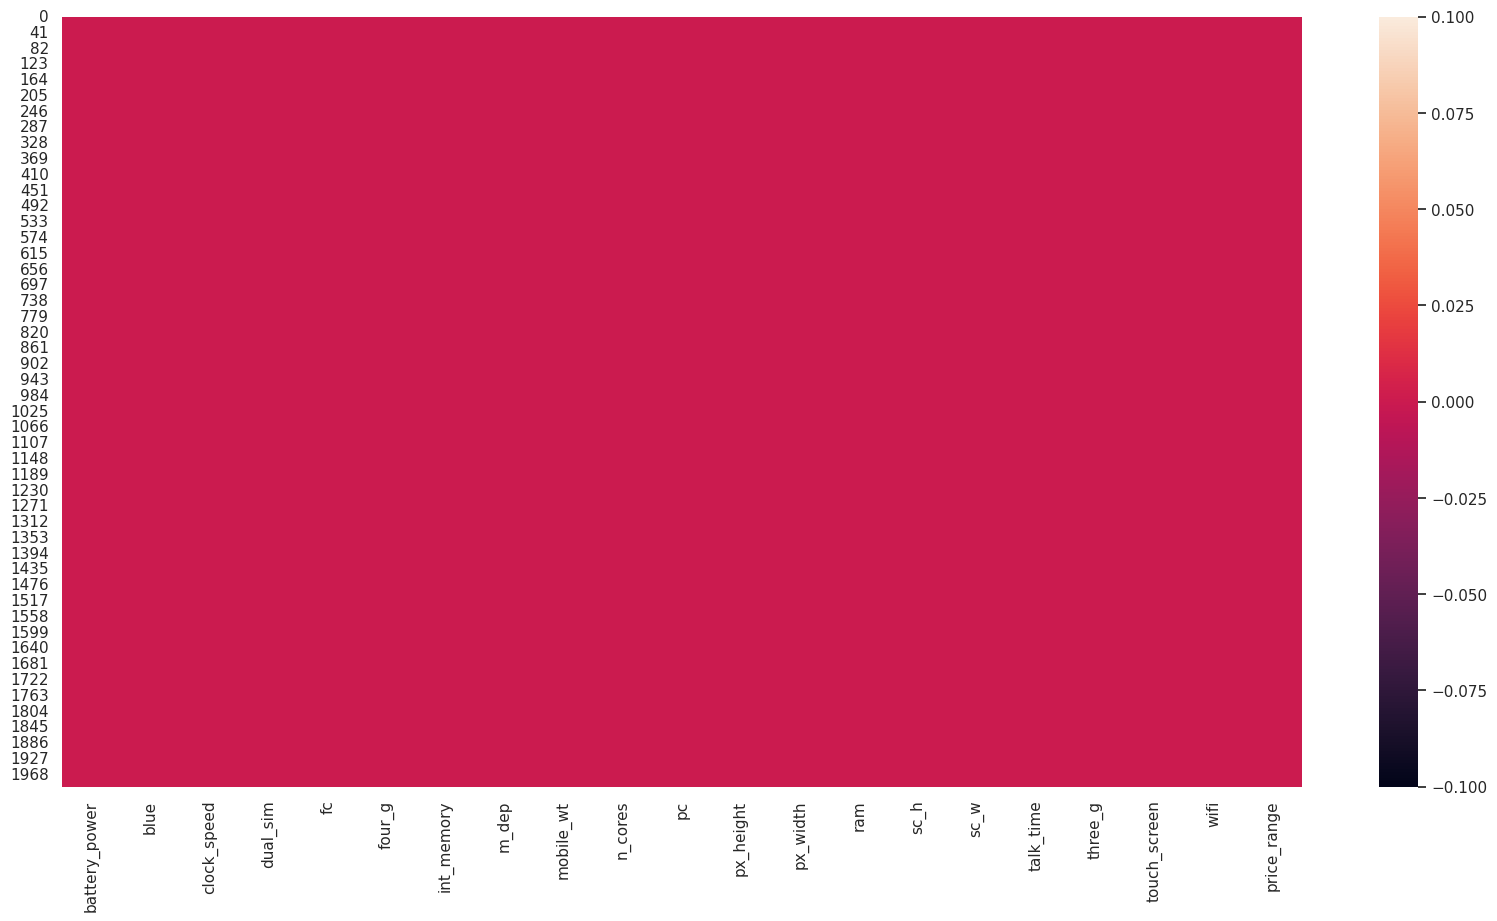

In [ ]:
# Visualizing the missing values
fig,axes = plt.subplots(1,1,figsize=(20,10))
sb.heatmap(A.isna())
plt.show()

We can see that in above Heatmap, there is no white line , which means that there is no null value.

In [ ]:
A.shape

(2000, 21)

### What did you know about your dataset?



*   There are 2000 observations and 21 features.



*   There are no null values.


*   Dataset has unique values i.e.,there is no duplicate, which means data is free from bias as duplicates which can caues problems in downstream analysis, such as biasing results or making it difficult to accurately summarize the data.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
list(A.columns)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
# Dataset Describe
#Transpose of Data Description
A.describe()
A.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### Variables Description

Battery_power=Total energy a battery can store in one time measured in mAh.

Blue=Has blutooth or not.

Clock_speed= speed at which microprocessor executes instructions.

Dual_sim=Has dual sim support or not.

Fc=from camera mega pixels.

Four_g=Has 4G or not.

Int_memory=Internal memory in Gigabytes.

M_dep=Mobile Depth in cm.

Mobile_wt=Weight of bobile phone.

N_cores=Number of cores of processor.

Pc=Primary Camera mega pixels.

Px_height=Pixel Resolution Height.

Px_width=Pixel Resolution Width.

Ram=Random Access Memory in Mega.

Touch_screen=Has touch screen or not.

Sc_h=Screen height of mobile in CM.

Sc_w=Screen Width od mobile in CM.

Talk_time=Longest time that a single battery charge will last when you are.

Three_g=Has 3G or not.

price_range= This is the target variable with value of 0(low cost), 1(medium cost) , 2(High cost), 3(very high cost).




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in A.columns:
  unique_values=A[column].unique()
  print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

In [ ]:
# Check Unique Values.
for i in A.columns:
    print(i, len(A[i].unique()))

battery_power 1094
blue 2
clock_speed 26
dual_sim 2
fc 20
four_g 2
int_memory 63
m_dep 10
mobile_wt 121
n_cores 8
pc 21
px_height 1137
px_width 1109
ram 1562
sc_h 15
sc_w 19
talk_time 19
three_g 2
touch_screen 2
wifi 2
price_range 4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0.
# Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

# count number of phones with sc_w=0
sc_w_zero_count=sum(A.sc_w==0)
print(f"Number of phones with sc_w=0: {sc_w_zero_count}")

# count number of phones with px_height=0
px_height_zero_count=sum(A.px_height==0)
print(f"Number of phones with px_height=0: {px_height_zero_count}")


Number of phones with sc_w=0: 180
Number of phones with px_height=0: 2


In [ ]:
# Replace 0 values with mean value
sc_w_mean=A.sc_w.mean()
px_height_mean=A.px_height.mean()

A.sc_w=np.where(A.sc_w==0,sc_w_mean, A.sc_w)
A.px_height=np.where(A.px_height==0,px_height_mean, A.px_height)

# Print updated DataFrame
print(A)


      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

### What all manipulations have you done and insights you found?



*   I have found that number of phones with pixel resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.

*   The minimum value of px_height and sc_w should not be 0, as it dose not make sense width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.
*   So the 0 values are replaced with the mean values and no missing values left in the table so our data is ready for data analysis.





## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Price Range

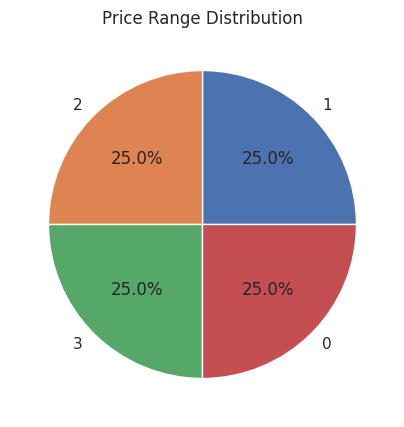

In [ ]:
# Chart - 1 visualization code
#classes
price_count=A["price_range"].value_counts()
plt.pie(price_count,labels=price_count.index,autopct="%1.1f%%")
plt.title("Price Range Distribution")
plt.show()


##### 1. Why did you pick the specific chart?



*  I picked this chart to know the distribution of percentage of phones with price range low or high.












##### 2. What is/are the insight(s) found from the chart?



*   I picked this chart to know the distribution of percentage of phones with price range low or high.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes we are able to know distribution of phones in percentage so we have information about distributions.



#### Chart - 2: Battery Power

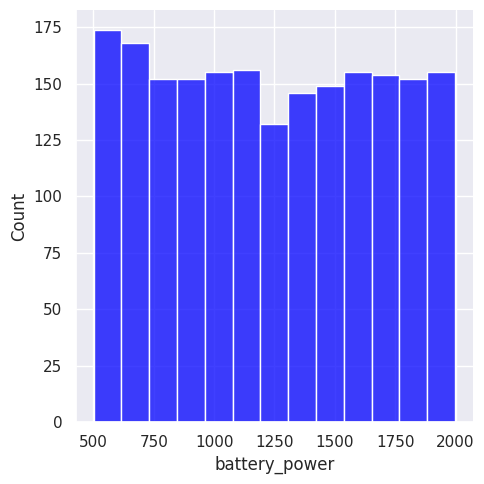

In [ ]:
# Chart - 2 visualization code
sb.set(rc={"figure.figsize":(5,5)})
sb.displot(A["battery_power"],color="blue")
plt.show()

##### 1. Why did you pick the specific chart?



*   
To know the count increasing with battery power or not.



##### 2. What is/are the insight(s) found from the chart?



*   This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price. range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes. The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact. If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost, they may be able to attract more customers and generate more revenue by offering phones at higher price points. Additionally, this information can also inform marketing and advertising efforts, as companies can use this insight to highlight the battery capacity of their phones as a key selling point to potential customers.



#### Chart - 3: Bluetooth

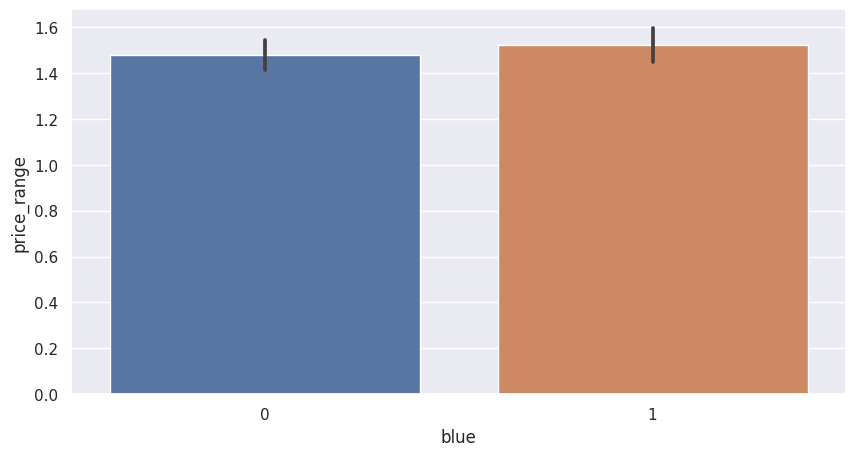

In [ ]:
# Chart - 3 visualization code

fig,ax=plt.subplots(figsize=(10,5))
sb.barplot(data=A,x="blue",y="price_range",ax=ax)
plt.show()

##### 1. Why did you pick the specific chart?



*   To know the devices having bluetooth or not with price range.



##### 2. What is/are the insight(s) found from the chart?



*   Almost half the devices have Bluetooth, and half don't.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.





*   The observation that almost half of the devices in the dataset have Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.
*   On the other hand, this observation could also have negative consequences if a company misinterprets or misuses this information. For instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunities. Therefore, it is important to interpret this information carefully and use it in a way that aligns with customer preferences and market trends.



#### Chart - 4: RAM

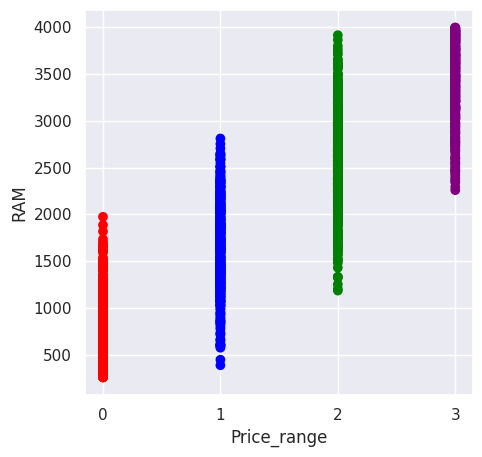

In [ ]:
# Chart - 4 visualization code
#Create a color map for the point based on price range
colors={0:"red",1:"blue",2:"green",3:"purple"}

#Create the scatterplot
plt.scatter(A["price_range"],A["ram"], c=A["price_range"].apply(lambda x:colors[x]))
plt.xlabel("Price_range")
plt.ylabel("RAM")
plt.xticks([0,1,2,3])
plt.show()

##### 1. Why did you pick the specific chart?


*   To know the price relation with ram.




##### 2. What is/are the insight(s) found from the chart?



*   The scatter plot shows a clear positive correlation between RAM and price range, with the majority of the data points clustering towards the upper right corner. This suggests that as the price range increases, the amount of RAM in the device generally increases as well.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




*   The insights gained from the scatter plot, such as the positive correlation between RAM and price range, can be valuable for businesses. For example, businesses can use this information to design and market smartphones with higher RAM for customers willing to pay higher prices, potentially leading to increased revenue and profits.




#### Chart - 5: dual_sim

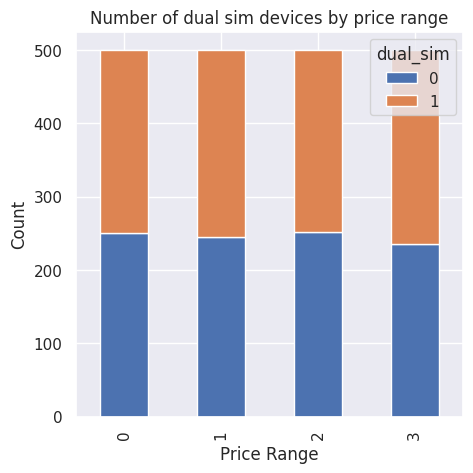

In [ ]:
# Chart - 5 visualization code

# Group the data by price range and dual_sim , and count the number of devices in each group
sim_count = A.groupby(["price_range","dual_sim"])["dual_sim"].count()

# Reshape the data into dataframe  with price range as row , dual sim sa column, and the count as values
sim_count=sim_count.unstack()

# plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind="bar",stacked=True)

# Add axis labels and a title
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Number of dual sim devices by price range")

# show the plot
plt.show()

##### 1. Why did you pick the specific chart?



*   To know the price range according to dual sim using or not.



##### 2. What is/are the insight(s) found from the chart?



*   We can observe that upto low/mediumhigh almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Yes it is very useful because we can identify dual sim is actually increasing count or not. It is found that for device containing dual sim.



#### Chart - 6: screen size

We can convert the screen size variable from centimeters to inches to align with real life usage, as screen size are typically communicated in inches.

In [ ]:
# Chart - 6 visualization code
# Define a new variable "sc_size" as the diagonal screen size in inches
A["sc_size"]=np.sqrt((A["sc_h"]**2)+(A["sc_w"]**2)) # calculating the diagonal screen size.
A["sc_size"]=round(A["sc_size"]/2.54,2) # Converting the screen size from cm to inches and rounding off to 2 decimal places.

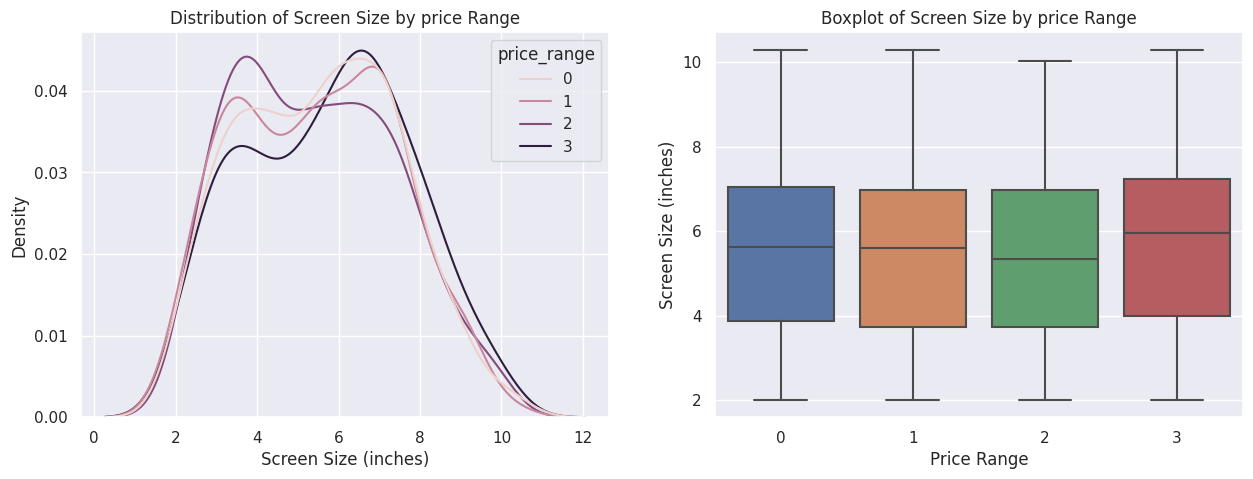

In [ ]:
# Creating a new variable sc_size in inches
A["sc_size"]=np.sqrt((A["sc_h"]**2)+(A["sc_w"]**2))/2.54
A["sc_size"]=A["sc_size"].round(2)

# Plot the distribution and Boxplot of screen size by price range
fig, axs=plt.subplots(1,2,figsize=(15,5))
sb.kdeplot(data=A,x="sc_size",hue="price_range",ax=axs[0])
sb.boxplot(data=A,x="price_range",y="sc_size",ax=axs[1])

# Set axis labels and title
axs[0].set_xlabel("Screen Size (inches)")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution of Screen Size by price Range")
axs[1].set_xlabel("Price Range")
axs[1].set_ylabel("Screen Size (inches)")
axs[1].set_title("Boxplot of Screen Size by price Range")

# show the plot
plt.show()



##### 1. Why did you pick the specific chart?



*   To know the distribution of screensize by price range and price range respect to screen size.



##### 2. What is/are the insight(s) found from the chart?



*   The analysis of the Screen Size distribution among different target categones indicates that there is not a significant difference in the distribution, suggesting that Screen Size may not be the sole driving factor in determining the target categories. However, this uniformity in distribution can be advantageous for predictive modeling, as it implies that Screen Size may not be a significant variable in differentiati between different target categories, allowing other features to play a more crucial role in determining the target categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.





*   The gained insights from the analysis of various features of mobile phones can have a positive impact on businesses. By understanding which features are most important in determining the price range of mobile phones, businesses can make informed decisions about product development, marketing, and pricing strategies. For example, if a particular brand has a reputation for producing high-quality cameras, they can leverage this information to target customers who prioritize camera quality and are willing to pay a premium price for it.


*   However, there can also be insights that lead to negative growth if not properly considered. For instance, if a business only focuses on a single feature such as pixel width or camera megaporels without considering other factors like brand value or processor speed, they may misprice their products and lose customers to competitors who offer better overall value. Additionally, if a business relies heavily on a particular feature that is no longer in demand or becomes outdated, it may struggle to remain competitive in the market. Therefore, it is crucial to take a holistic approach and consider multiple factors when making decisions based on data analysis.





#### Chart - 7: pixel_width

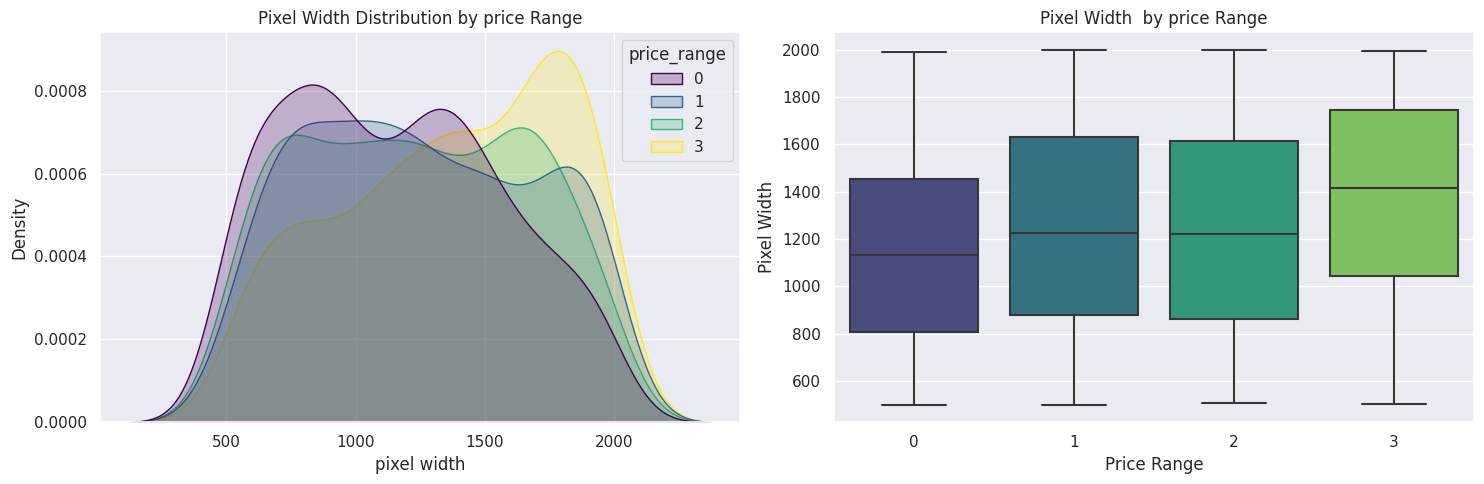

In [ ]:
# Chart - 7 visualization code
#set up the figure and axes
fig, axs=plt.subplots(1,2,figsize=(15,5))

# Create a kernel density estimate plot for the pixel width distribution for each price range
sb.kdeplot(data=A,x="px_width",hue="price_range",fill=True,common_norm=False,palette="viridis",ax=axs[0])
axs[0].set_xlabel("pixel width")
axs[0].set_ylabel("Density")
axs[0].set_title("Pixel Width Distribution by price Range")

# Create a box plot of pixel width for each price range
sb.boxplot(data=A,x="price_range",y="px_width",palette="viridis",ax=axs[1])
axs[1].set_xlabel("Price Range")
axs[1].set_ylabel("Pixel Width")
axs[1].set_title("Pixel Width  by price Range")

# Adjust the layout and spacing
plt.tight_layout()

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?



*   To know the pixel width on the price range.



##### 2. What is/are the insight(s) found from the chart?



*   Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. Other features such as processor, camera quality, storage capacity, and brand value may also play a significant role in determining the price range. Therefore, a holistic approach considering multiple factors is necessary for accurate pricing and positioning of mobile phones in the market Pixel height is almost similar as we move from Low cost to Very high cost little variation in pixel_height.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   The insights gained from the analysis of pixel height distribution across different price ranges can help create a positive business impact by providing useful information to mobile phone manufacturers and marketers. By understanding the relationship between pixel height and price range, manufacturers can optimize their product design and pricing strategy to meet the demands of the market and improve sales. Marketers can also leverage this information to develop targeted advertising campaigns and promotions that appeal to the preferences of different consumer segments.



#### Chart - 8: FC (front camera megapixels)

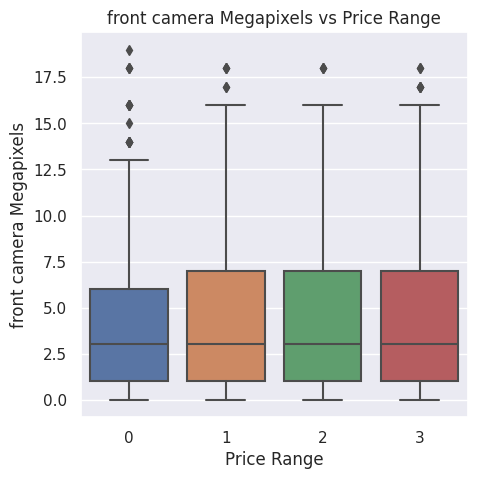

In [ ]:
# Chart - 8 visualization code
# Create a boxplot of front camera megapixels grouped by price range
sb.boxplot(x="price_range", y="fc", data=A)

# Set x and y axis labels and title
plt.xlabel("Price Range")
plt.ylabel("front camera Megapixels")
plt.title("front camera Megapixels vs Price Range")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?



*   To know the impact of price range on front camera megapixels.



##### 2. What is/are the insight(s) found from the chart?



*   It is almost same impact of price range in all categories.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   The observation that the distribution of front camera megapixels is similar across all price ranges suggests that this feature alone may not be a helpful predictor of price range. However, this does not necessarily mean that the insights gained from this analysis cannot create a positive business impact.

*   For example, understanding the limitations of certain features in predicting price range can inform the development of more accurate models that consider multiple features simultaneously. This can lead to better pricing strategies and more effective product positioning, ultimately resulting in increased revenue and growth.
*   On the other hand, if a company relied solely on front camera megapixels to determine pricing, this could lead to negative growth if competitors offered more advanced features that customers value more highly. Therefore, it is important for businesses to consider multiple factors and stay up-to-date with evolving customer preferences and technological advancements in order to remain competitive in the market.



#### Chart - 9: PC (Primary camera megapixels)

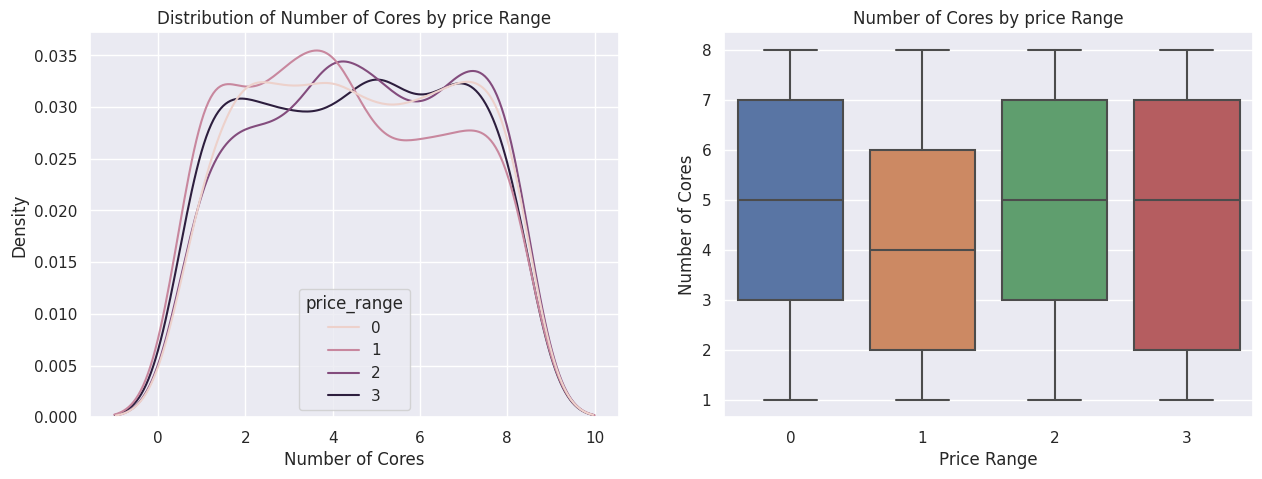

In [ ]:
# Chart - 9 visualization code
#set up the figure and axes
fig, axs=plt.subplots(1,2,figsize=(15,5))

# Create a kernel density estimate plot for the distribution of number of cores aacross price range
sb.kdeplot(data=A,x="n_cores",hue="price_range",ax=axs[0])
axs[0].set_xlabel("Number of Cores")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution of Number of Cores by price Range")

# Create a box plot of the distribution of number of core for each price range
sb.boxplot(data=A,x="price_range",y="n_cores",ax=axs[1])
axs[1].set_xlabel("Price Range")
axs[1].set_ylabel("Number of Cores")
axs[1].set_title("Number of Cores by price Range")

# show the plot
plt.show()

##### 1. Why did you pick the specific chart?



*   To know the distribution of number of cores by price range.




##### 2. What is/are the insight(s) found from the chart?



*   The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones. This consistency is a positive sign for prediction modeling, as it suggests that this feature may not be a major confounding factor in predicting the price range



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.







*   The gained insights can help create a positive business impact by providing an understanding of the relationship between different features and the price range of mobile phones. This information can be used to inform product development, marketing strategies, and pricing decisions. For example, if the analysis shows that processor speed is a significant factor in determining price range, a company could focus on developing mobile phones with faster processors to target higher price ranges.
*   However, there may also be insights that lead to negative growth. For instance, if the analysis shows that a particular feature that the company is known for, such as camera quality, is not a significant factor in determining price range, this could lead to negative growth if the company continues to prioritize camera quality over other features that are more important to customers.

*   Therefore, it is important to carefully consider all insights and use them to inform a holistic approach to product development and marketing strategies to ensure a positive business impact.






#### Chart - 10: Univariate Analysis of Categorical columns.

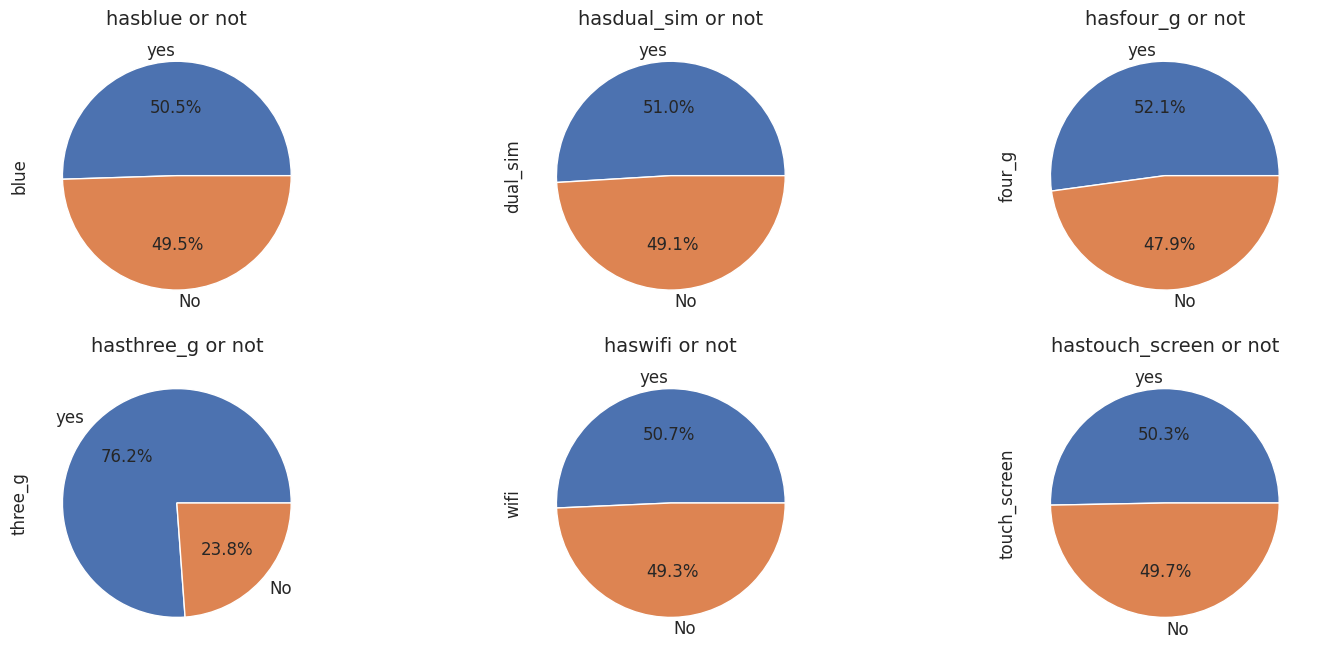

In [ ]:
#plotting the Piecharts for binary categorical variables.
plt.figure(figsize=(15,10))

row=3
col=3
count=1

var_list=["blue","dual_sim","four_g","three_g","wifi","touch_screen"]
labels=["yes","No"]
for var in var_list:
  plt.subplot(row,col,count)
  A[var].value_counts().plot.pie(autopct="%1.1f%%",fontsize=12,labels=labels)
  plt.title(f"has{var} or not",fontsize=14)
  plt.tight_layout()
  count=count+1


##### 1. Why did you pick the specific chart?



*   To know the distribution of Univariate Analysis of Categorical columns.



##### 2. What is/are the insight(s) found from the chart?









*   1 means it has the specifications.

*   O means it do not have the specifications.
*   Percentage Distribution of Mobiles having bluetooth dual sim, 4G, wifi and touchscreen are almost 50 %.


*    very few mobiles(23.8%) do not have Three_g.



#### Chart - 11: Relation Between RAM,Battery_Power, px_height, and px_width

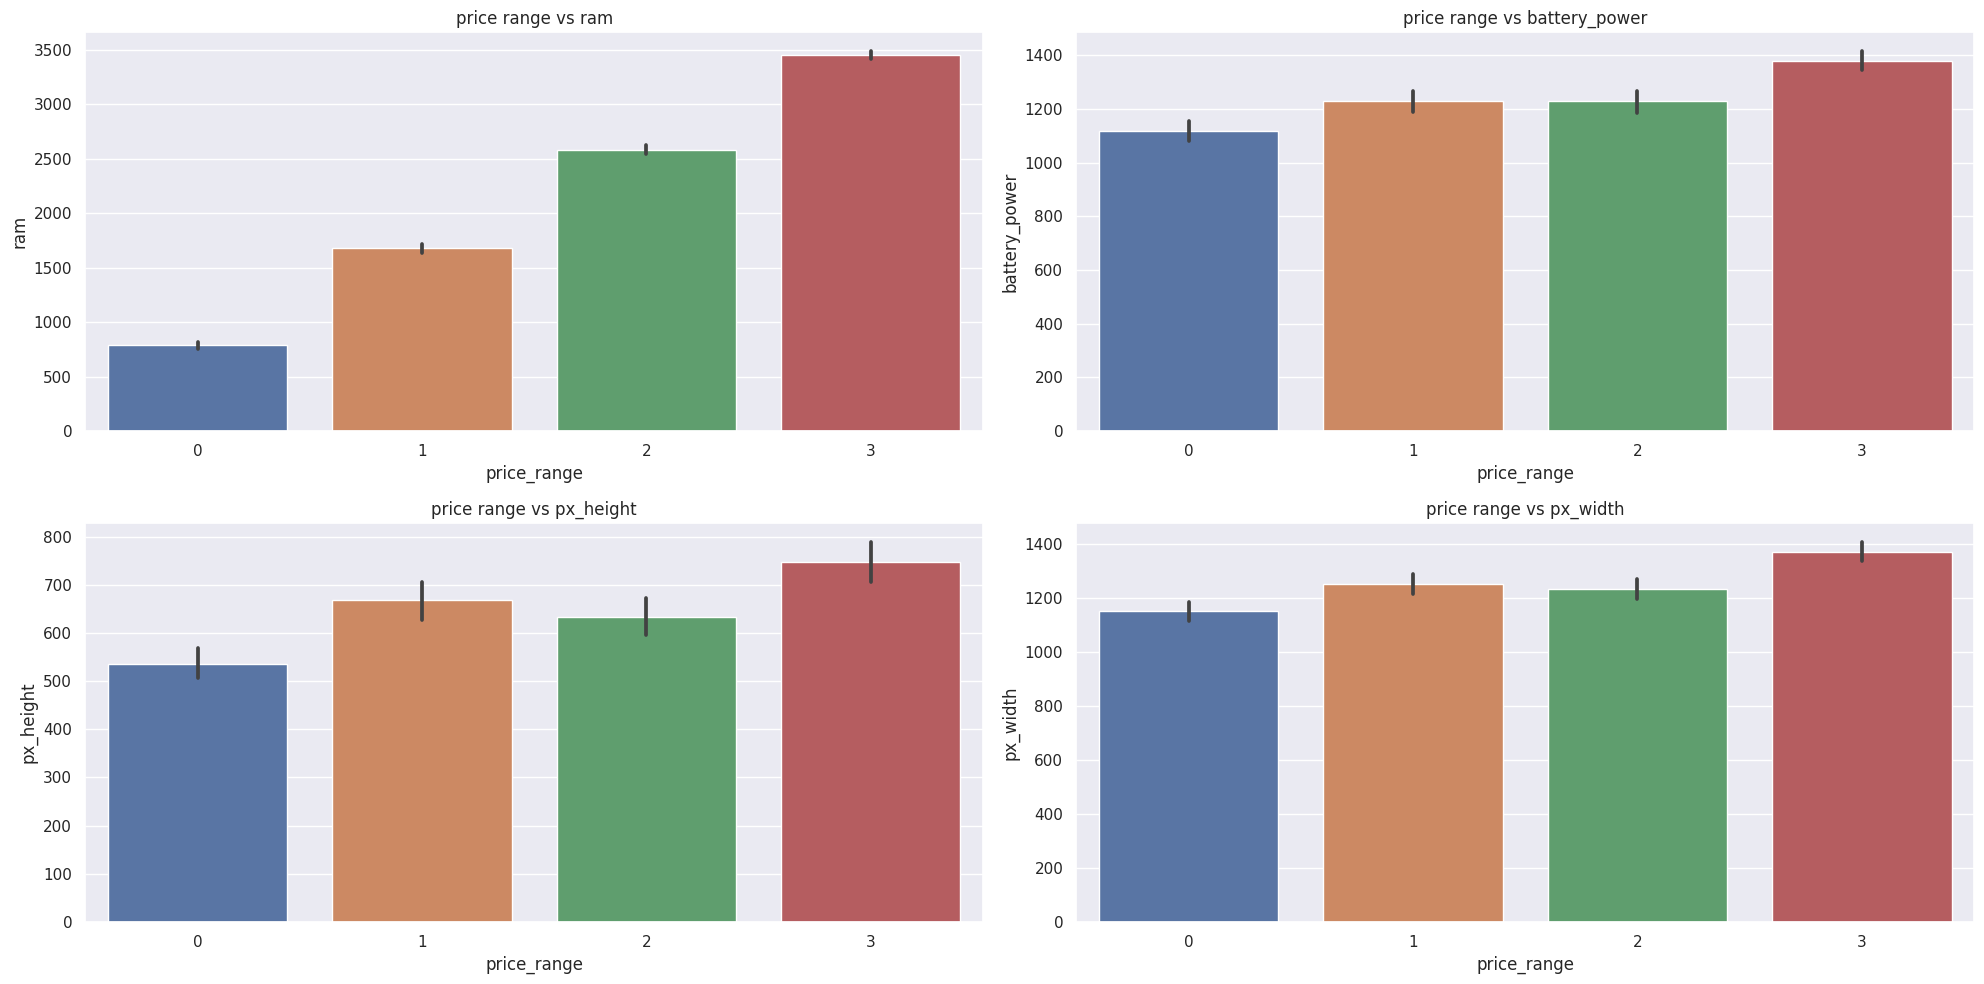

In [ ]:
# Chart - 11 visualization code
#Plotting price_range vs other fearures
plt.figure(figsize=(20,10))

labels=["0=low_cost","1=medium_cost","2=high_cost","3=very_high_cost"]

row=2
col=2
count=1

variables=["ram","battery_power","px_height","px_width"]

for var in variables:
    plt.subplot(row,col,count)
    sb.barplot(x=A["price_range"],y=A[var])
    plt.title(f"price range vs {var}")
    count=count+1
    plt.tight_layout()

##### 1. Why did you pick the specific chart?



*   To know the distribution of Relation Between RAM,Battery_Power, px_height, and px_width.



##### 2. What is/are the insight(s) found from the chart?



*   Mobiles having RAM more than 3000MB falls under Very high cost category As RAM increases price range also increases.

*   Mobiles having RAM less than 1000 MB falls under low cost category.
*   Mobiles with battery power more than 1300 mAh has very high cost. And Mobiles with battery power between 1200 and 1300 mAH falls under medium and high cost category.


*   Mobiles with more than 700 pixel height and width more than 1300 has very high cost.



#### Chart - 12 - Correlation Heatmap

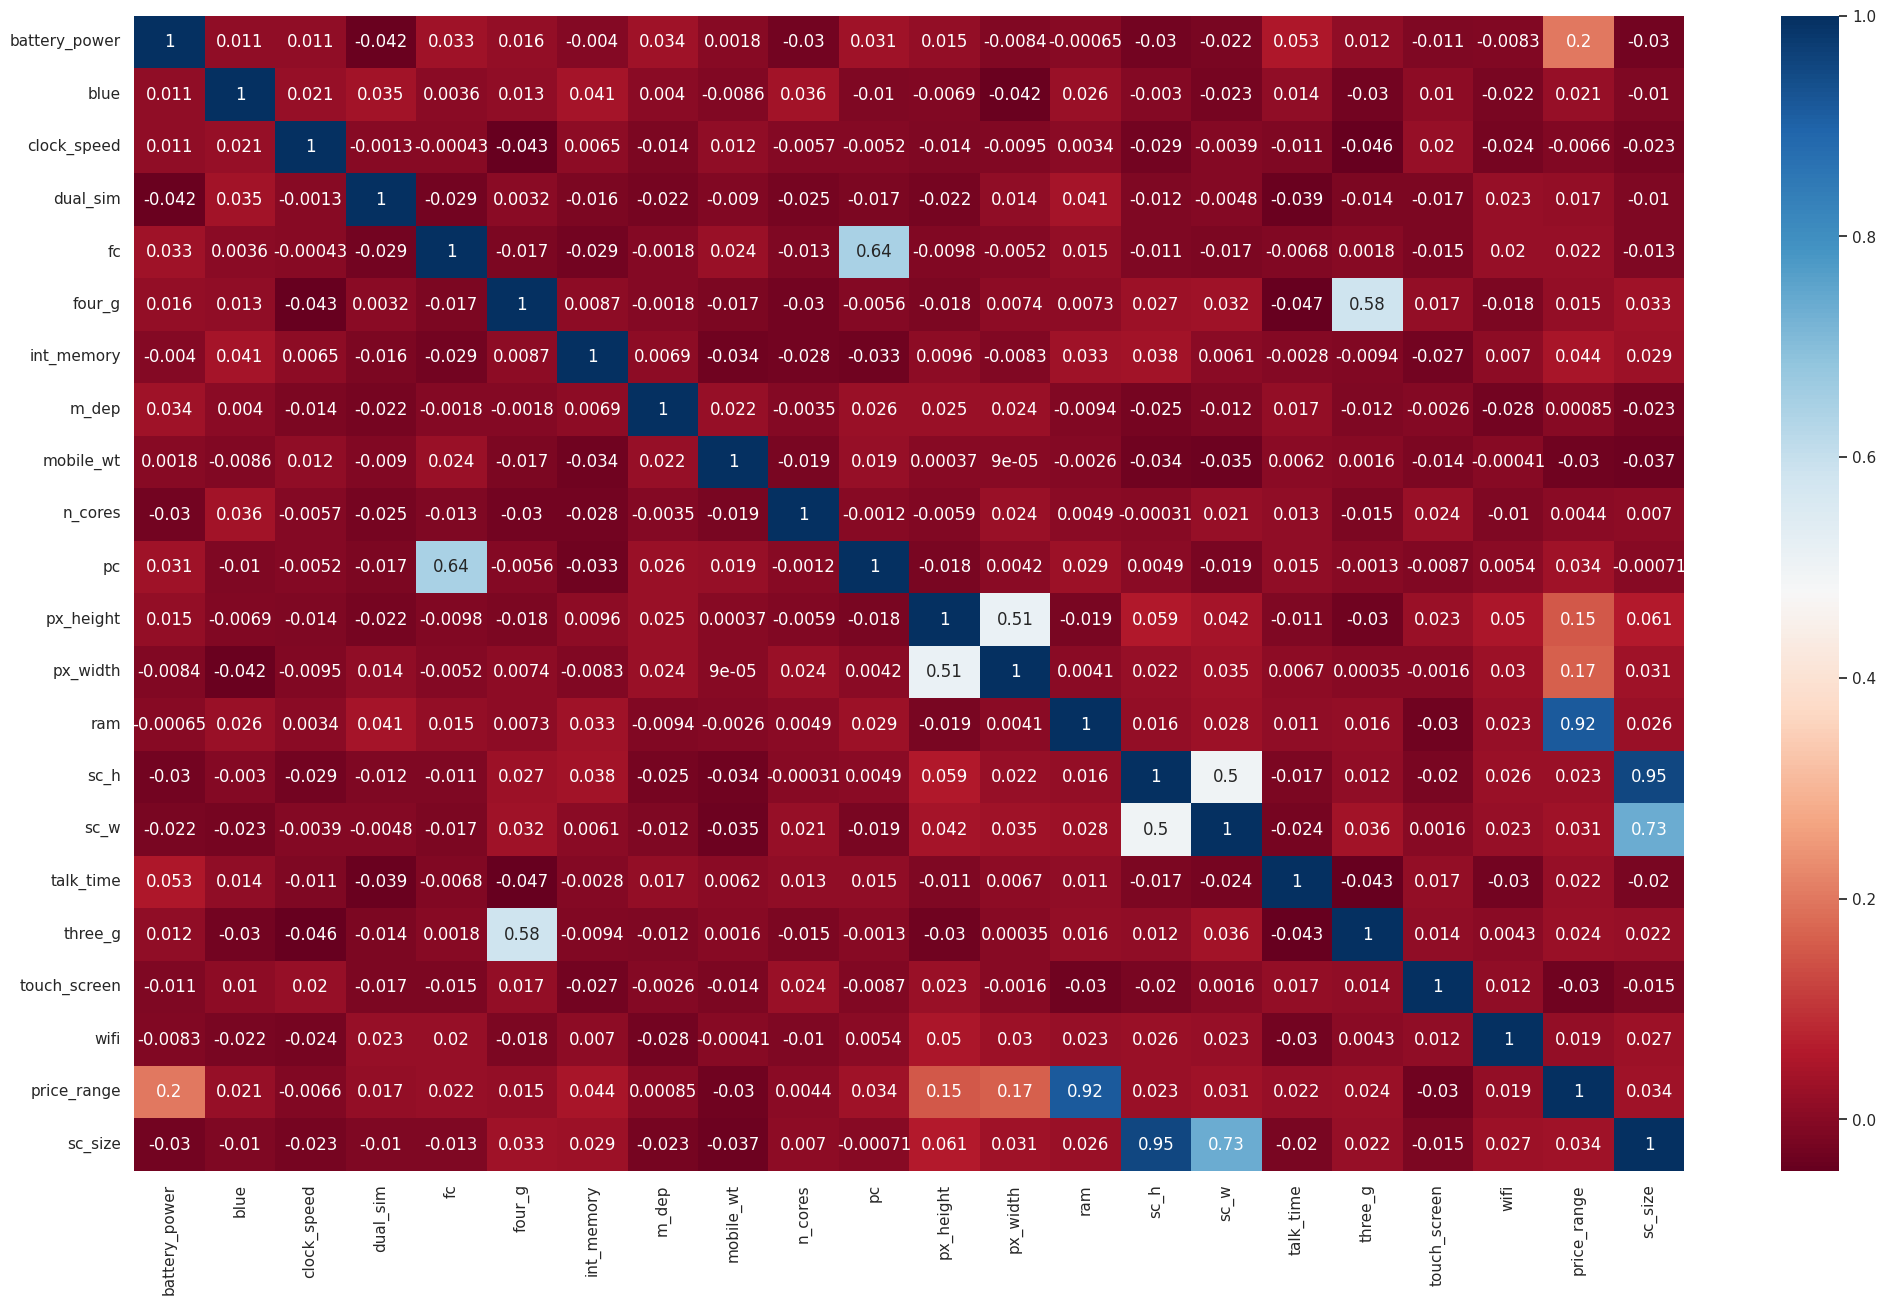

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(25,15))
sb.heatmap(A.corr(), cmap="RdBu", annot=True)
plt.show()

##### 1. Why did you pick the specific chart?



*   To check the multi-collinearity



##### 2. What is/are the insight(s) found from the chart?



*   The high correlation between RAM and price range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.





*   However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features (pc", "fc') and (px.width, 'px.height). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.
*   To address this collinearity, we could consider replacing the px height' and 'px width features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the fo' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities (front camera megapixels vs. primary camera megapixels).





#### Chart - 13 - Pair Plot

In [ ]:
# Pair Plot visualization code
#plt.figure(figsize=(15,7))
#sb.pairplot(A, hue = 'price_range')
#plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: All category phones are distributed with equal price range

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null hypothesis (HO). All categories of phones are distributed with equal price range. Alternative hypothesis.
*   Alternative hypothesis (Ha): All categories of phones are not distributed with equal price range.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy import stats

# Calculate observed frequency distribution
observed_freq=A["price_range"].value_counts().values

# calculate expected frequency distribution
total=len(A)
expected_freq=[total/4]*4

# perform chi_square goodness of fit test
chi2,p=stats.chisquare(observed_freq,f_exp=expected_freq)

# Print results
print(f"chi_square statistic:{chi2},p-value:{p}")

chi_square statistic:0.0,p-value:1.0


##### Which statistical test have you done to obtain P-Value?



*   In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range, we used the Chi square goodness-of-fit test to obtain the p-value. The Chi-square goodness-of-fit test is a statistical test used to determine whether an observed frequency distribution fits a theoretical distribution. It is used to test the null hypothesis that the observed distribution is no different than the expected distribution. The p-value obtained from the Chi-square goodness-of-fit test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. A p-value less than the significance level (usually 0.05) indicates that we reject the null hypothesis and conclude that the observed distribution is significantly different than the expected distribution. A p-value greater than or equal to the significance level indicates that we fail to reject the null hypothesis and conclude that the observed distribution is not significantly different than the expected distribution.



##### Why did you choose the specific statistical test?



*   In the hypothesis testing example where we tested the statement "All category phones are distributed with equal price range", I chose the Chi- square goodness-of-fit test because it is an appropriate statistical test to use when we want to compare an observed frequency distribution with a theoretical distribution, such as the null hypothesis distribution. In this case, the rhill hypothesis states that all categories of phones have an equal price range distribution. Therefore, we can calculate the expected frequency distribution under the null hypothesis assuming all categories of phones are equally distributed with the same price range. We can then compare this expected frequency distribution with the observed frequency distribution obtained from the data using the Chi-square goodness-of-fit test. The Chi-square test statistic measures the difference between the expected and observed frequency distributions, and the p-value obtained from the test indicates the probability of observing a test statistic as extreme as the one obtained from the sample, assuming the null hypothesis is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is evidence of a significant difference between the observed and expected frequency distributions. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is no evidence of a significant difference between the observed and expected frequency distributions Therefore, the Chi-square goodness-of-fit test is an appropriate statistical test to use in this scenario.



### Hypothetical Statement - 2: Around in 25% the wifi is not available and in 75% the wifi is available

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis (HD) The proportion of times when wifi is not available is equal to or less than 0.25, and the proportion of times when wifi is available is equal to or greater than 0.75.
*   Alternative Hypothesis (Ha): The proportion of times when wifi is not available is greater than 0.25, or the proportion of times when will is available is less than 0.7.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null hypothesis proportion
null_prop=0.75

# Define the sample size
n=100

# Calculate the probability of observing k devices with availability
k=range(0,n+1)
null_probabilities=stats.binom.pmf(k,n,null_prop)

# Print the probability of observing exactly k device with wifi availability
for i in range(len(k)):
  print("k=",k[i],"probability=",null_probabilities[i])

k= 0 probability= 6.223015277861142e-61
k= 1 probability= 1.8669045833583227e-58
k= 2 probability= 2.772353306287135e-56
k= 3 probability= 2.7169062401614005e-54
k= 4 probability= 1.976549289717431e-52
k= 5 probability= 1.1384923908772418e-50
k= 6 probability= 5.407838856666808e-49
k= 7 probability= 2.1785865108286599e-47
k= 8 probability= 7.59782045651491e-46
k= 9 probability= 2.3299982733312306e-44
k= 10 probability= 6.360895286194311e-43
k= 11 probability= 1.561310661156789e-41
k= 12 probability= 3.4739162210738324e-40
k= 13 probability= 7.054722172026841e-39
k= 14 probability= 1.315201776356432e-37
k= 15 probability= 2.2621470553330563e-36
k= 16 probability= 3.605296869437044e-35
k= 17 probability= 5.344322418224349e-34
k= 18 probability= 7.392979345210341e-33
k= 19 probability= 9.571962731167161e-32
k= 20 probability= 1.1629934718368003e-30
k= 21 probability= 1.3291353963849202e-29
k= 22 probability= 1.4318413133782987e-28
k= 23 probability= 1.456742901437053e-27
k= 24 probability

In [ ]:
import statsmodels.stats.proportion as smprop

# Define the null and alternative hypotheses
null_hypothesis="The proportion of devices with wifi availability is equal to 0.75."
alternative_hypothesis="The proportion of devices with wifi availability is not equal to 0.75."

# set the significance level
alpha=0.05

# Define the sample size and number of devices with wifi availability
n=100
num_with_wifi=75

# Perform the test
test_stat,P_value=smprop.proportions_ztest(num_with_wifi,n,null_prop)

# Print the result
if P_value<alpha:
  print("Reject the null hypothesis.")
else:
  print("Fail to reject the null hypothesis.")

print("Test statistic:",test_stat)
print("P_value:",P_value)


Fail to reject the null hypothesis.
Test statistic: 0.0
P_value: 1.0


##### Which statistical test have you done to obtain P-Value?



*   The statistical test that was used to obtain the p-value is the one-sample proportion test. This test is used to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant.

*   In the case of the null and alternative hypotheses provided, we used the one-sample proportion test to compare the proportion of devices with wifi availability in the sample to a known population proportion of 0.75 (ie, the proportion of devices with wifi availability in the population). The p-value obtained from the test represents the probability of observing a sample proportion as extreme as the one we observed (ie, 25% with wifi availability) under the null hypothesis that the population proportion is 0.75, If the p-value is below a predetermined significance level (e.g. 0.05), we reject the null hypothesis and conclude that the difference between the sample proportion and the population proportion is statistically significant. If the p-value is above the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to suggest that the difference between the sample proportion and the population proportion is statistically significant.



##### Why did you choose the specific statistical test?



*   chose the specific statistical test of the one-sample proportion test because the research question provided a hypothesis about the proportion of devices with wifi availability in a population. The one-sample proportion test is a statistical test that is specifically designed to compare a sample proportion to a known population proportion, and determine whether the difference between the two proportions is statistically significant

*   In this case, we had a known population proportion of 0.75 (ie, the proportion of devices with wifi availability in the population) and a sample proportion of 0.25 (e, the proportion of devices with wifi availability in the sample). By using the one-sample proportion test, we were able to determine whether the difference between these two proportions was statistically significant, and whether we could reject or fail to reject the null hypothesis,
*   Therefore, the one-sample proportion test was a suitable statistical test to use in this case, as it allowed us to test the research hypothesis and answer the research question using the available data.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
A.isna().sum().sort_values(ascending=False)

battery_power    0
blue             0
price_range      0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
pc               0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
sc_size          0
dtype: int64

Data has no missing values.

### 2. Handling Outliers

In [ ]:
# find Numerical variables
Numerical_col=A[["battery_power","clock_speed", "fc", 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', "px_height", 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [ ]:
# find categorical variables
cate_col=A.drop(labels=["battery_power","clock_speed", "fc", 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', "px_height", 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'],axis=1)

In [ ]:
Numerical_col.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

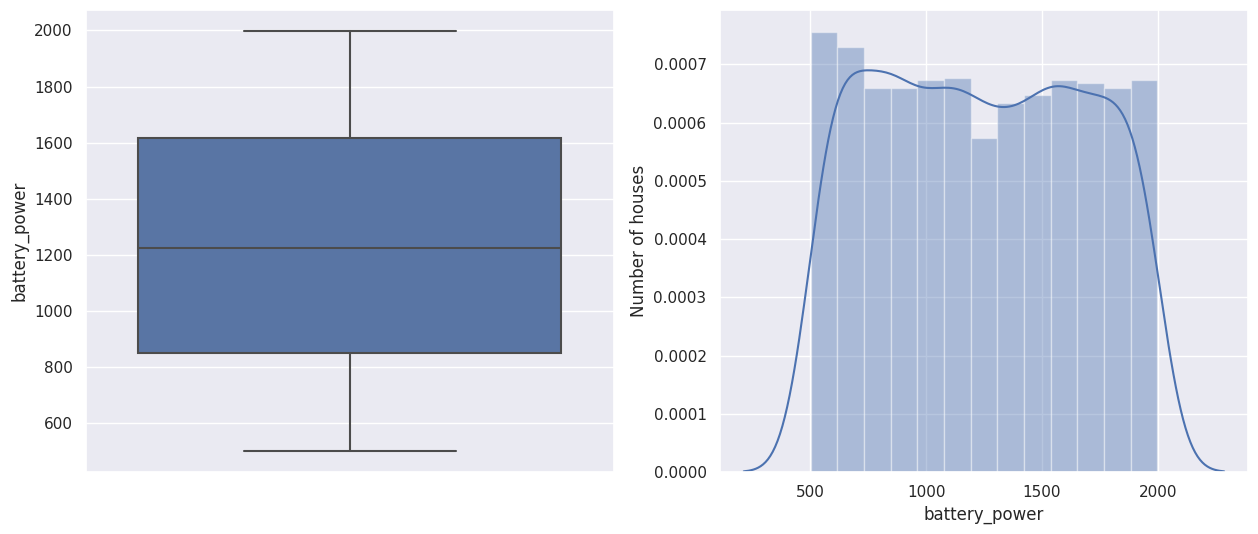

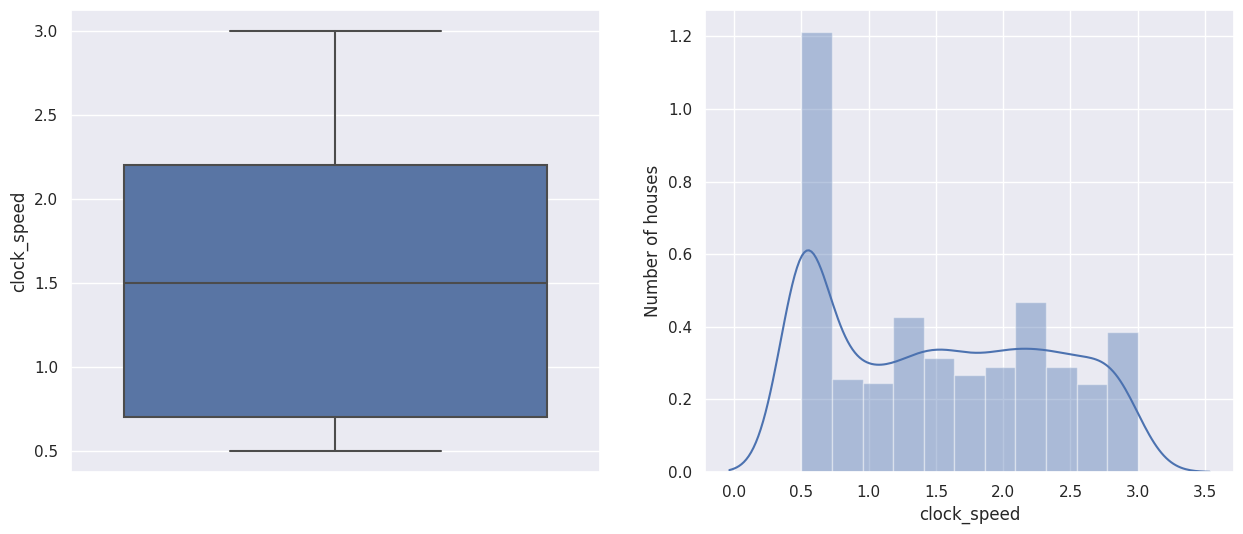

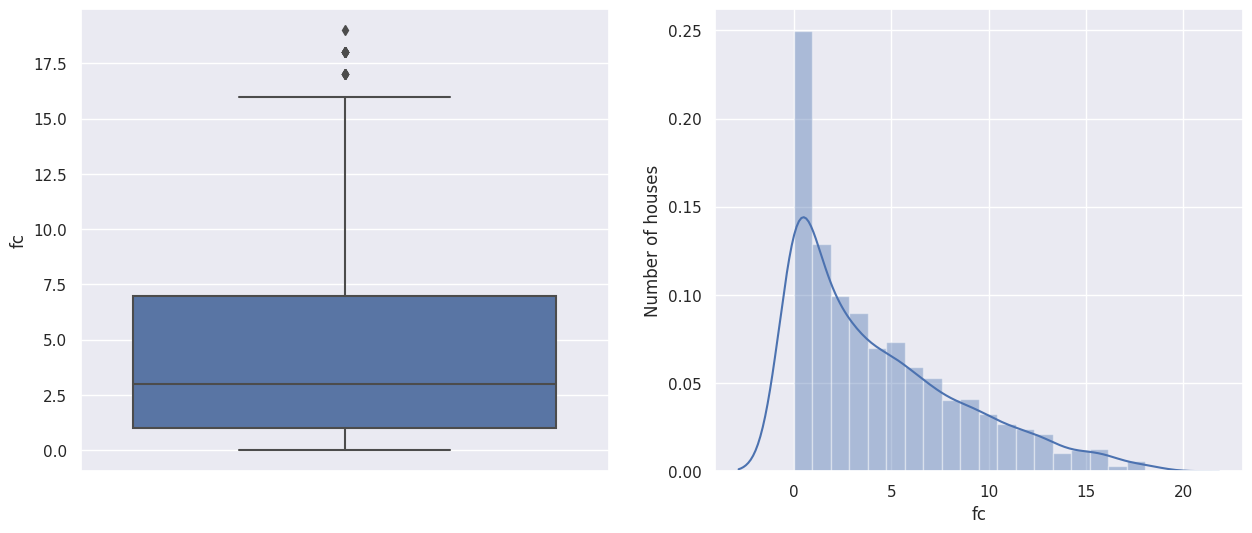

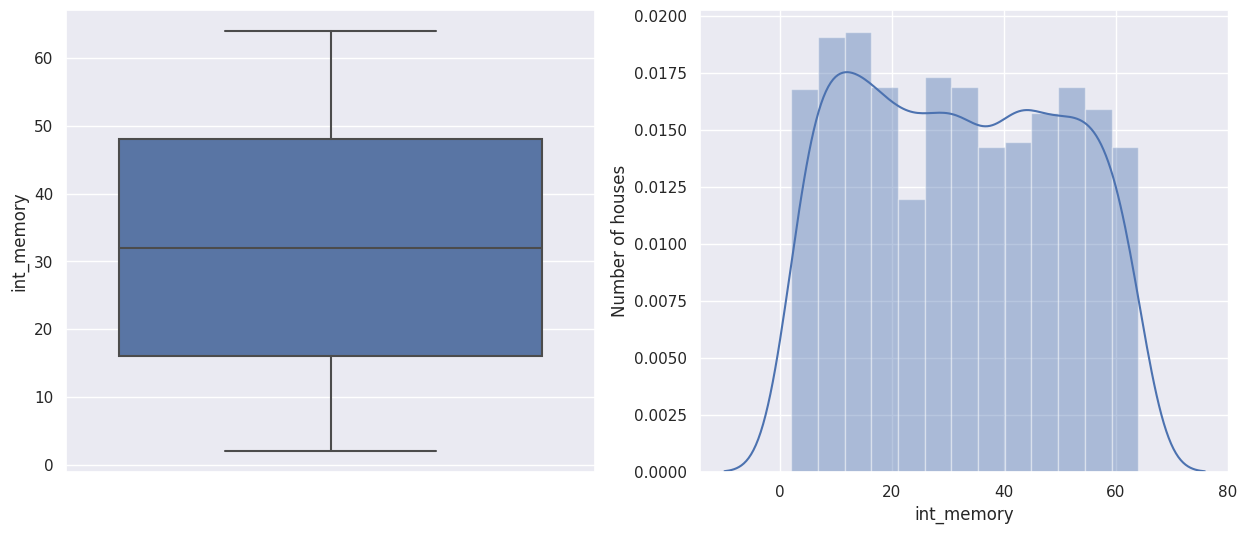

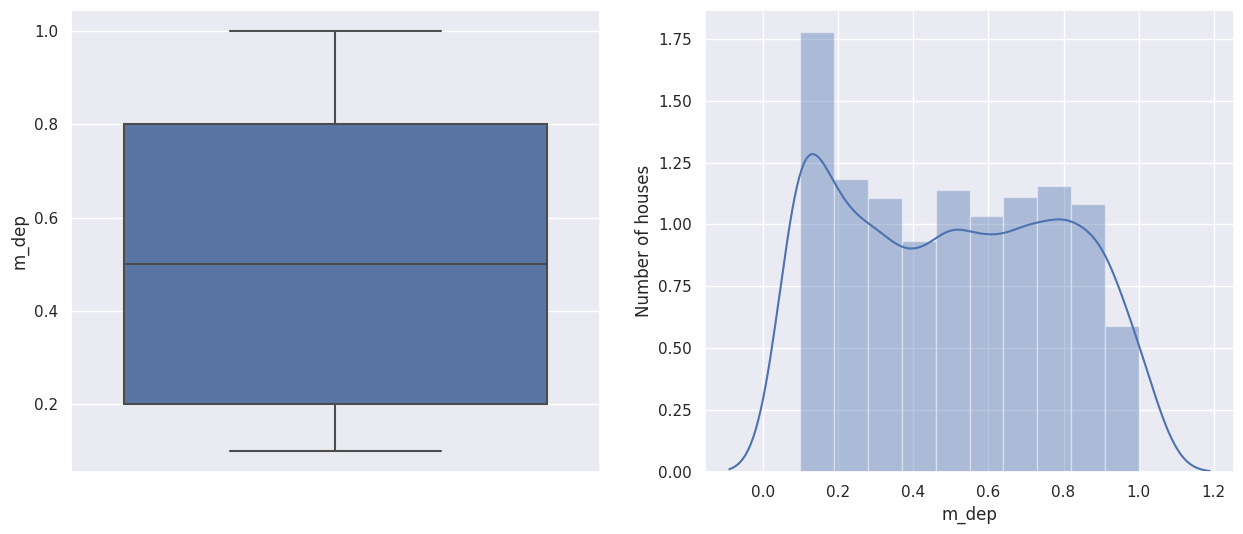

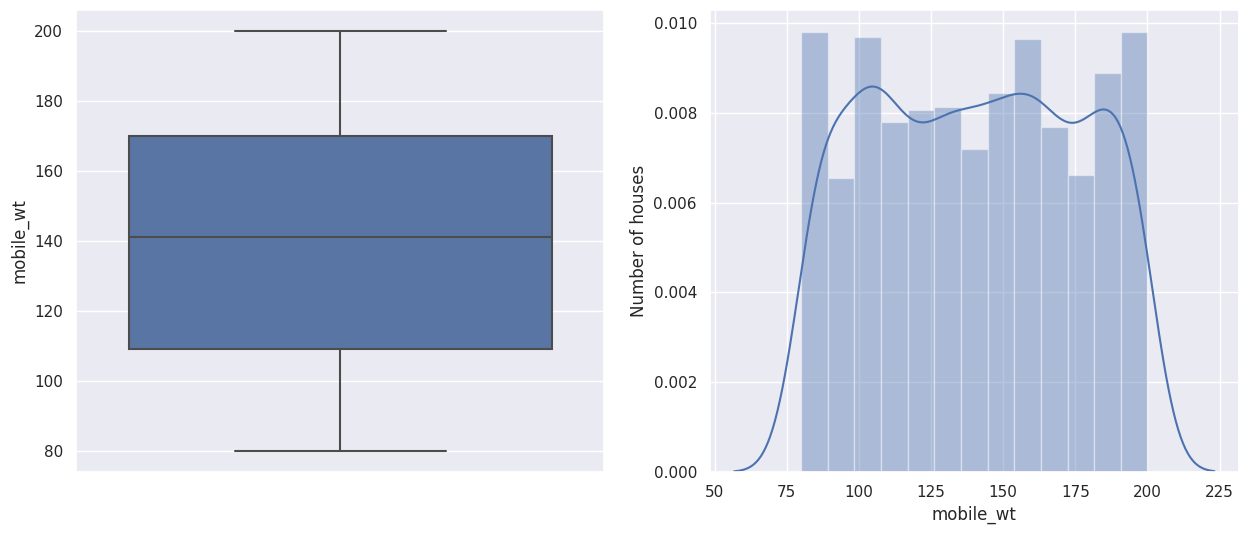

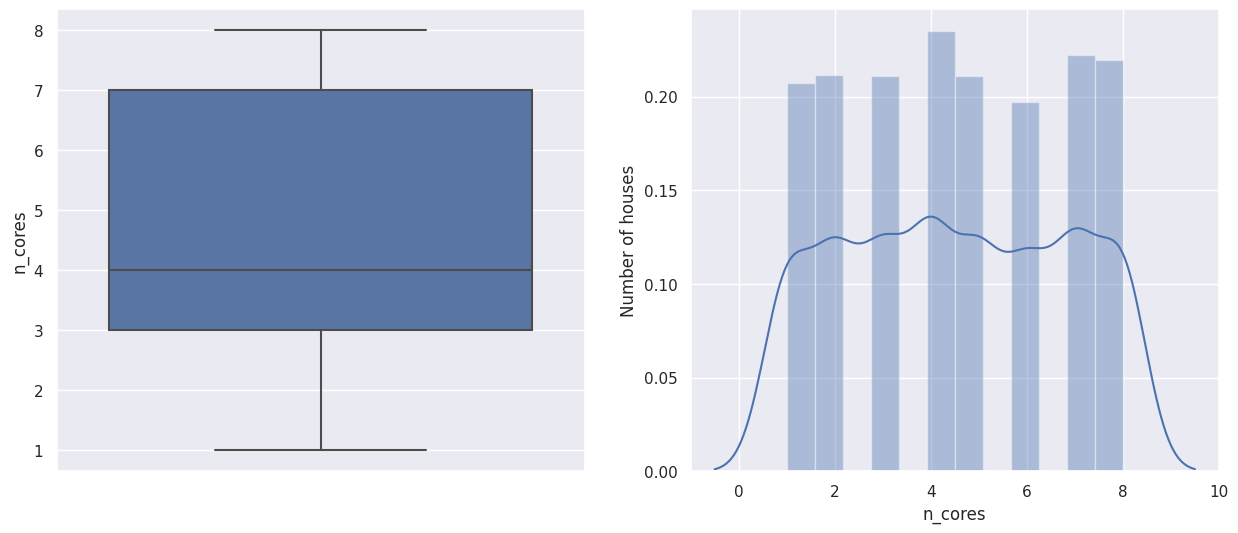

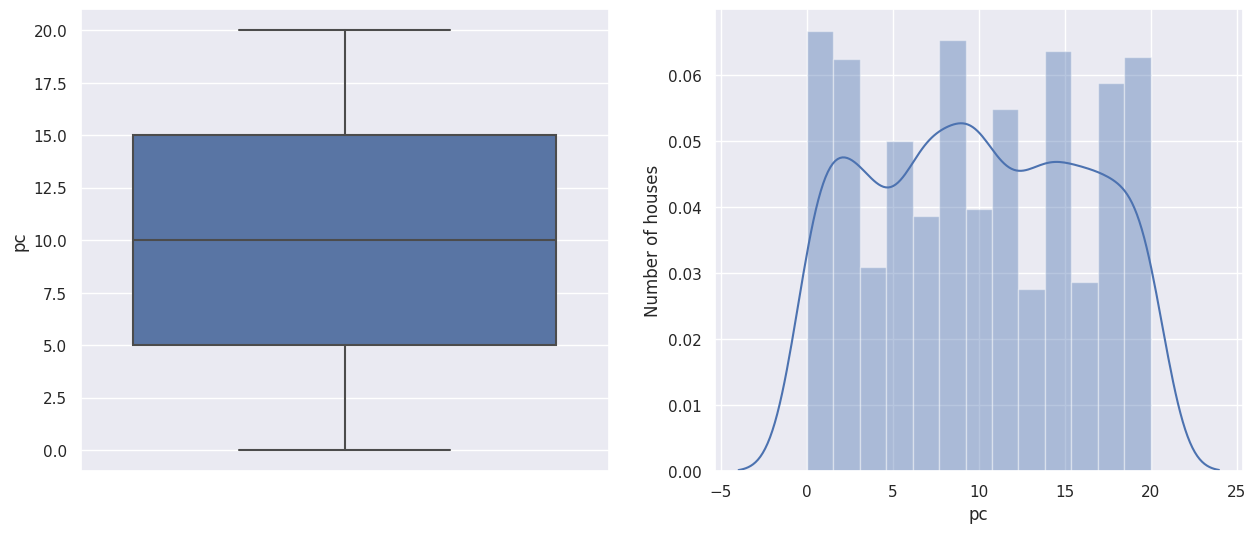

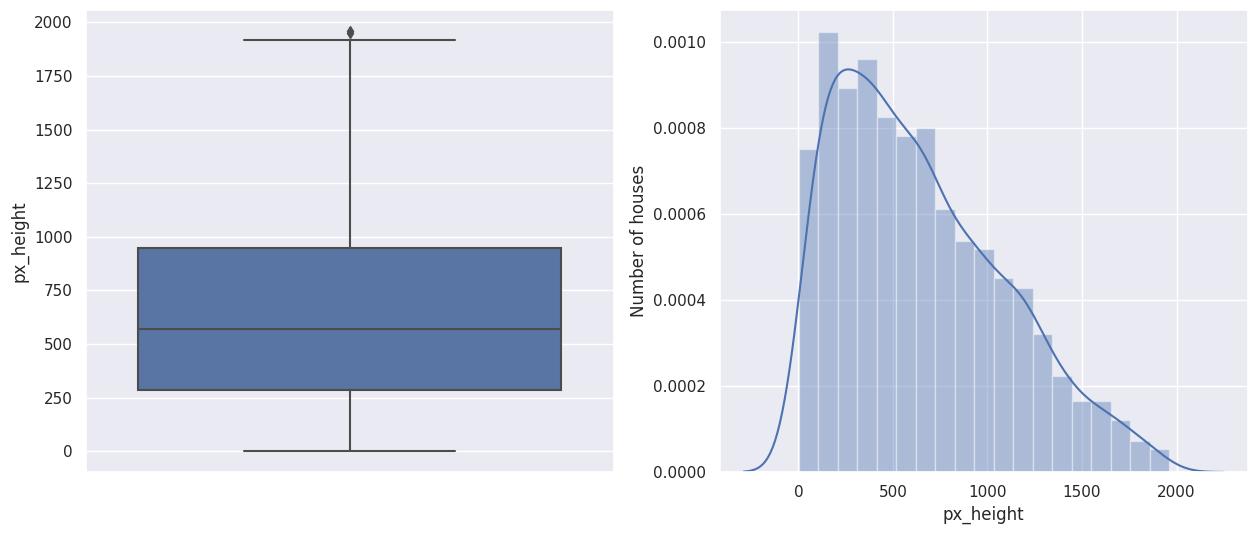

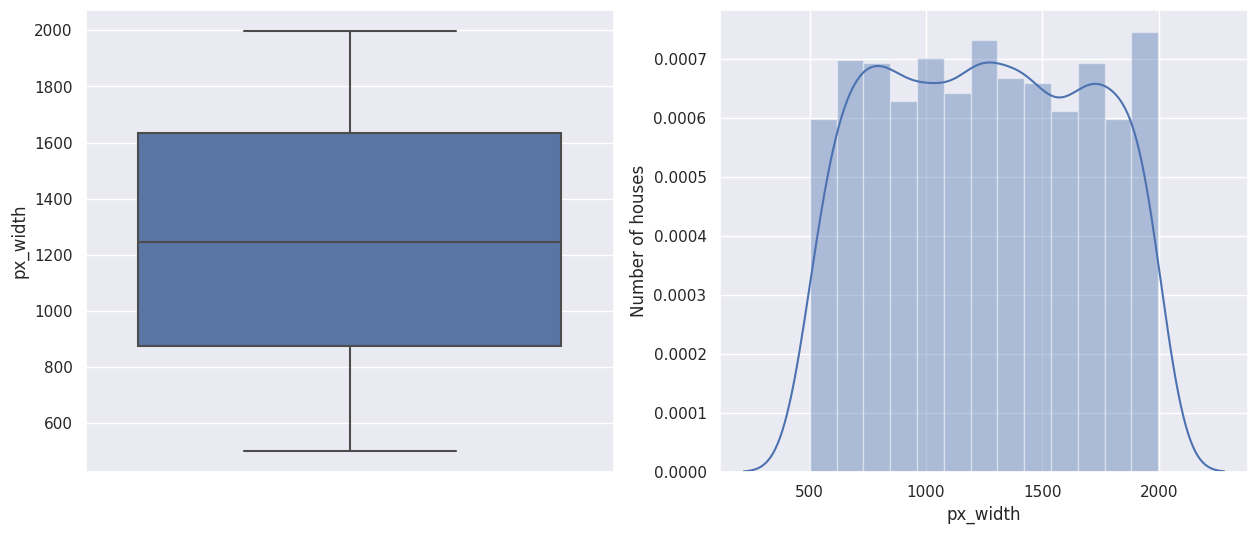

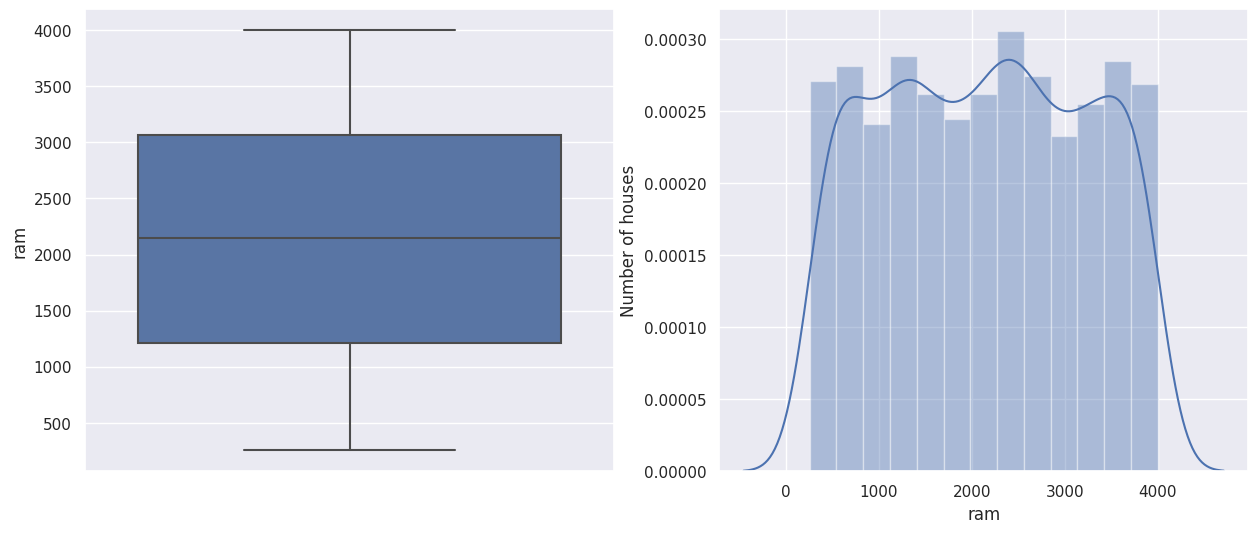

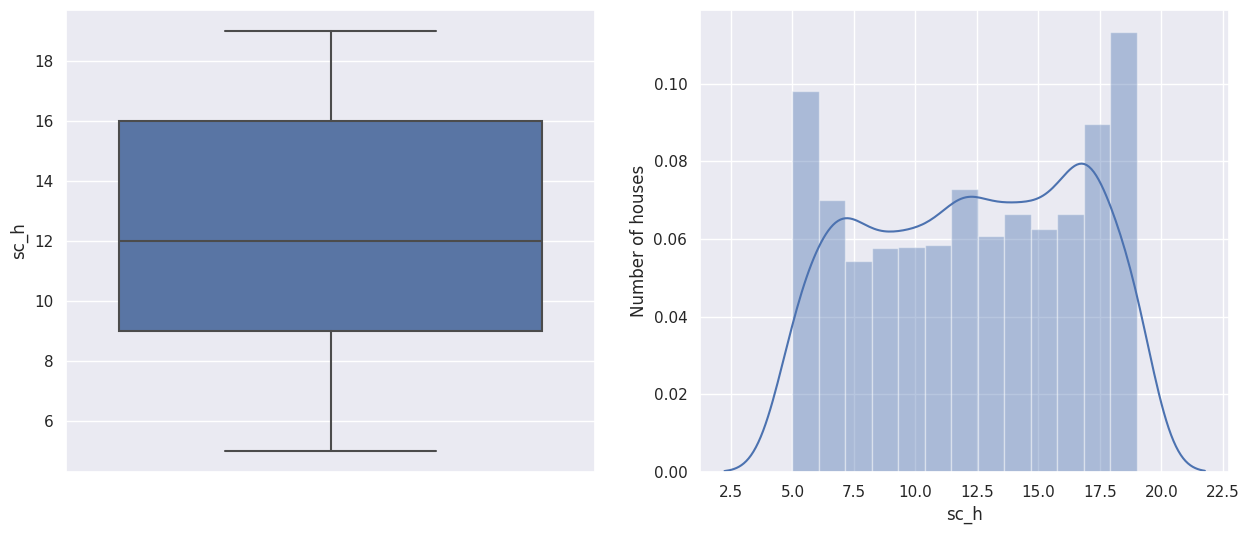

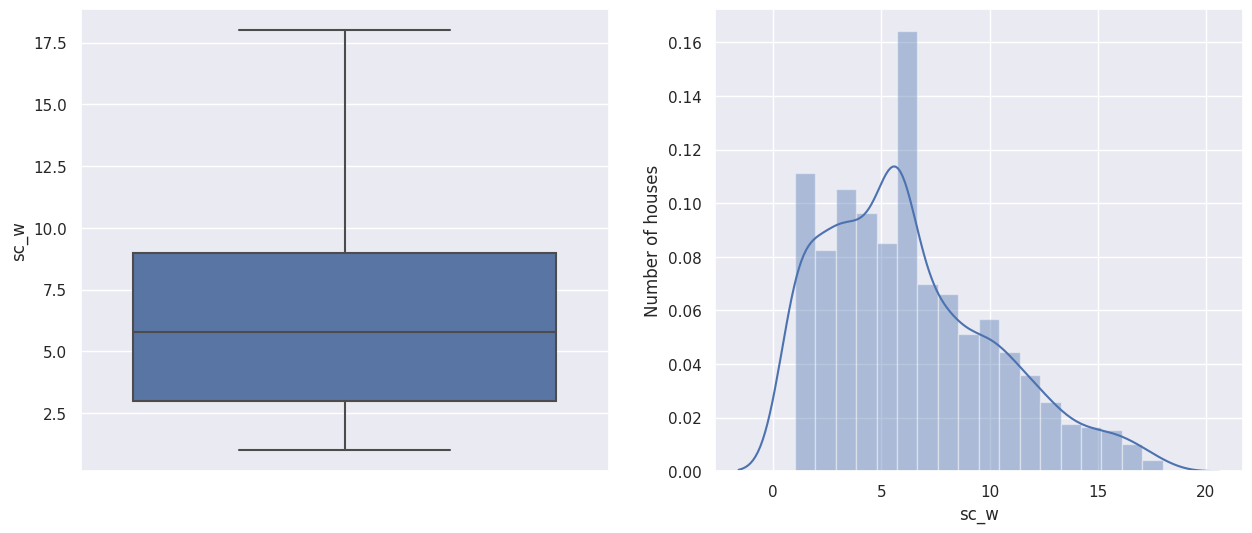

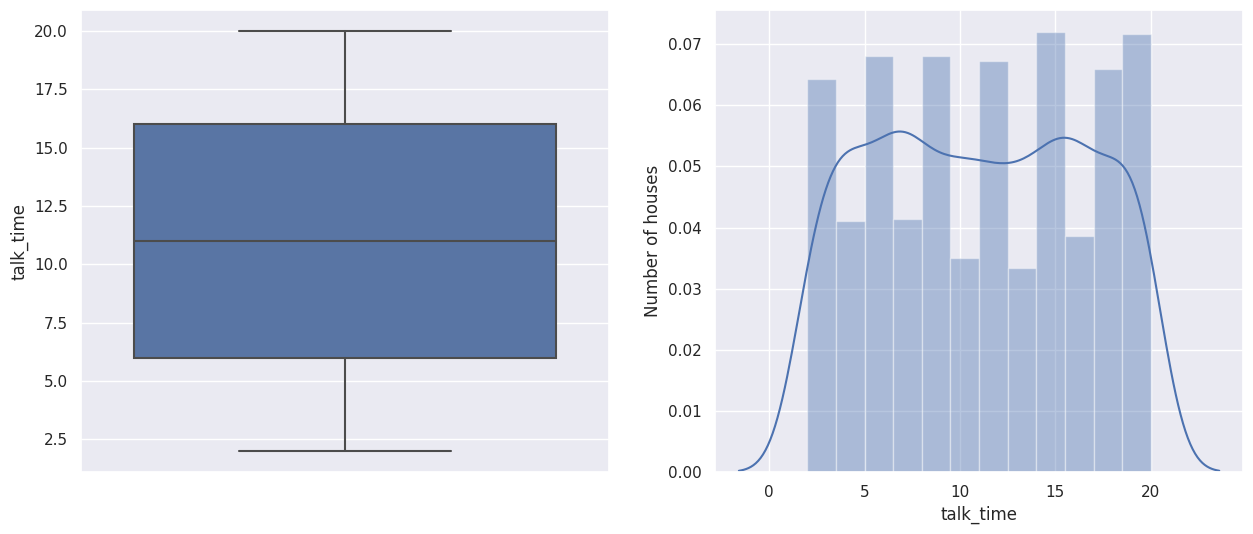

In [ ]:
# ploting box plot for checking the outliers.
for var in Numerical_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sb.boxplot(y=A[var])
    fig.set_title('')
    fig.set_ylabel(var)

    plt.subplot(1, 2, 2)
    fig = sb.distplot(A[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

In our data "px_height", and "fc" columns has Outlier.

In [ ]:
A[["px_height"]].value_counts()

px_height
347.0        7
179.0        6
275.0        6
371.0        6
649.0        5
            ..
688.0        1
689.0        1
694.0        1
701.0        1
1960.0       1
Length: 1137, dtype: int64

In [ ]:
# Capping the outlier rows with Percentiles
# Calculate the upper and lower limits
Q1 = A['px_height'].quantile(0.25)
Q3 = A['px_height'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

A.loc[(A["px_height"] > upper),"px_height"] = upper
A.loc[(A["px_height"] < lower),"px_height"] = lower

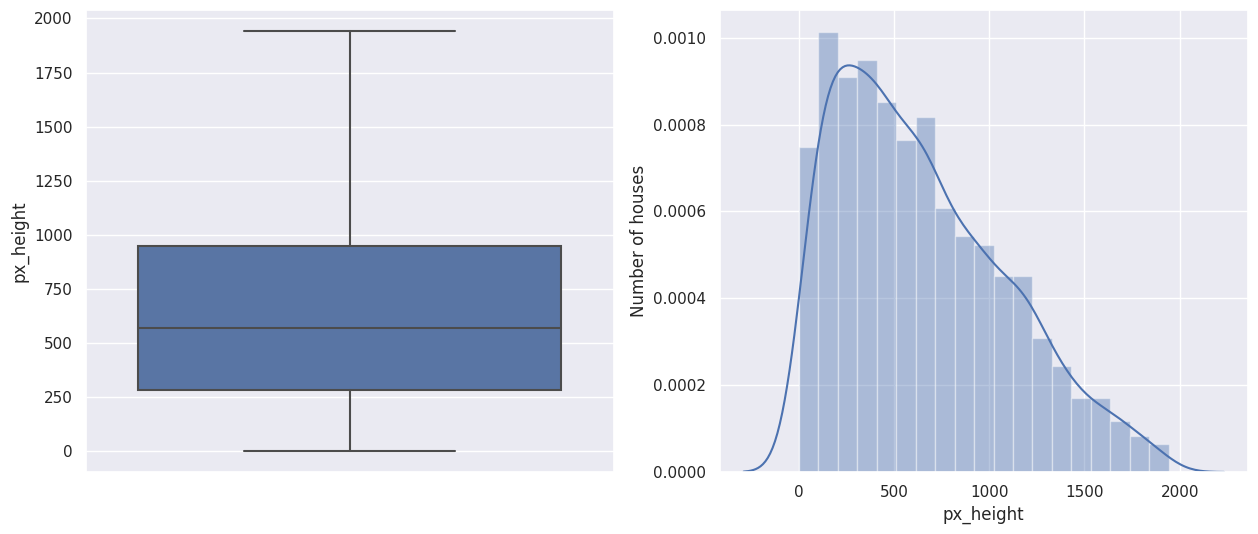

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sb.boxplot(y=A["px_height"])
fig.set_title('')
fig.set_ylabel("px_height")

plt.subplot(1, 2, 2)
fig = sb.distplot(A["px_height"].dropna())
fig.set_ylabel('Number of houses')
fig.set_xlabel("px_height")

plt.show()

In [ ]:
A[["fc"]].value_counts()

fc
0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
dtype: int64

In [ ]:
# #Capping the outlier rows with Percentiles
# Calculate the upper and lower limits
Q1 = A['fc'].quantile(0.25)
Q3 = A['fc'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

A.loc[(A["fc"] > upper),"fc"] = upper
A.loc[(A["fc"] < lower),"fc"] = lower

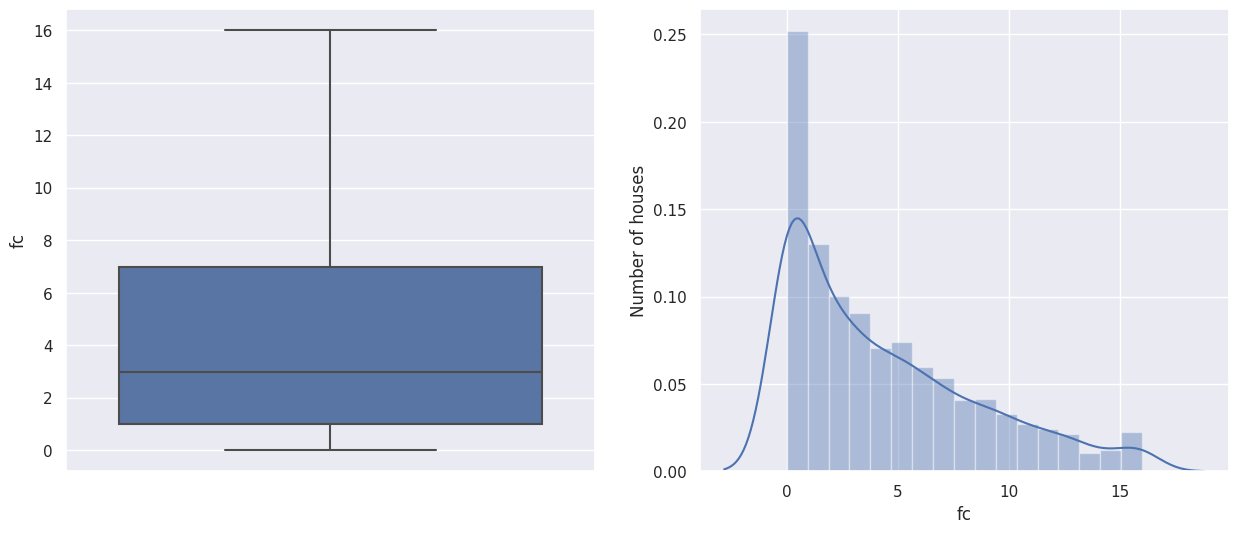

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
fig = sb.boxplot(y=A["fc"])
fig.set_title('')
fig.set_ylabel("fc")

plt.subplot(1, 2, 2)
fig = sb.distplot(A["fc"].dropna())
fig.set_ylabel('Number of houses')
fig.set_xlabel("fc")

plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We use IQR in Skew-symmetric Curve techniques for outlier treatment.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:

*   lower inner fence: Q1–1.5*IQ

*   upper inner fence: Q3 + 1.5*IQ
*   lower outer fence: Q1–3*IQ


*   upper outer fence: Q3 + 3*IQ



### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

Categorical encoding not necessary because all values are present in integer of float.

## 4. Feature Manipulation & Selection

### 1. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
Numerical_col.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [ ]:
#Applying VIF for finding multicolinearity in our data

from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(A):
  vif=pd.DataFrame()
  vif["variable"]=A.columns
  vif["vif"]=[variance_inflation_factor(A.values,i) for i in range(A.shape[1])]
  return(vif)


In [ ]:
# Calculate VIF value for each columns.

cal_vif(Numerical_col[[i for i in Numerical_col.describe().columns]])

,variable,vif
0,battery_power,7.951794
1,clock_speed,4.232102
2,fc,3.406040
3,int_memory,3.929220
4,m_dep,3.900945
5,mobile_wt,12.522372
6,n_cores,4.594675
7,pc,6.210645
8,px_height,4.257623
9,px_width,11.592640




*   If vif value grater then 10, its mean column has highly correleted with other columns.


*   mobile_wt has highest value of vif, so we have to drop it.





In [ ]:
cal_vif(Numerical_col[[i for i in Numerical_col.describe().columns if i not in ["mobile_wt"]]])

,variable,vif
0,battery_power,7.598043
1,clock_speed,4.125627
2,fc,3.404837
3,int_memory,3.891919
4,m_dep,3.826624
5,n_cores,4.512614
6,pc,6.170376
7,px_height,4.257361
8,px_width,11.195432
9,ram,4.541873




*   px_width has highest value of vif, so we have to drop it.






In [ ]:
cal_vif(Numerical_col[[i for i in Numerical_col.describe().columns if i not in ["mobile_wt","px_width"]]])

,variable,vif
0,battery_power,7.451072
1,clock_speed,4.077132
2,fc,3.404580
3,int_memory,3.867345
4,m_dep,3.785659
5,n_cores,4.415469
6,pc,6.131528
7,px_height,3.016832
8,ram,4.481002
9,sc_h,10.932532




*   px_width has highest value of vif, so we have to drop it.



In [ ]:
cal_vif(Numerical_col[[i for i in Numerical_col.describe().columns if i not in ["mobile_wt","px_width","sc_h"]]])

,variable,vif
0,battery_power,7.253452
1,clock_speed,4.039577
2,fc,3.403694
3,int_memory,3.774805
4,m_dep,3.761030
5,n_cores,4.345942
6,pc,6.069205
7,px_height,2.963844
8,ram,4.415972
9,sc_w,3.292166


Now all the column's vif value less then 10.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)



*   Applying VIF(variance_inflation_factor) is important because it will remove multicollinearity from our independ variables.
*   When multicollinearity is present, the estimated regression coefficients may become large and unpredictable, leading to unreliable inferences about the effects of the predictor variables on the response variable. Therefore, it is important to check for multicollinearity and consider using other regression techniques that can handle this problem.



In [ ]:
# This is final Numerical data we get after Dimesionality Reduction.

A_Numerical=Numerical_col.drop(labels=["mobile_wt","px_width","sc_h"],axis=1)

###2. Data Scaling

In [ ]:
# Define X and Y
Y=(A[["price_range"]])

In [ ]:
cate_col.columns

Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'sc_size'],
      dtype='object')

In [ ]:
A_Numerical.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'n_cores',
       'pc', 'px_height', 'ram', 'sc_w', 'talk_time'],
      dtype='object')

In [ ]:
# Scaling our continuous_data by applying Standardscaler.

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
A_Numerical_std=pd.DataFrame(ss.fit_transform(A_Numerical),columns=A_Numerical.columns)

In [ ]:
XX=A_Numerical_std.join(cate_col)

In [ ]:
X=XX.drop(labels=["price_range"],axis=1)

### 3. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

##### What data splitting ratio have you used and why?



*   We split our data into 80% training amd 20% testing.

*   The train-test split is used to estimate the performance of machine learning algorithms that are applicable for prediction-based Algorithms/Applications. This method is a fast and easy procedure to perform such that we can compare our own machine learning model results to machine results.



## ***7. ML Model Implementation***

### ML Model - 1

####**Logistic Regression**

In [ ]:
# ML Model - 1 Implementation

#Applying logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

# Fit the Algorithm
lr.fit(xtrain,ytrain)

# Predict on the model
y_pred_train=lr.predict(xtrain)
y_pred_test=lr.predict(xtest)

In [ ]:
#import the packages for Evaluation metric
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,auc,classification_report,confusion_matrix,auc

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,y_pred_train)

0.918125

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,y_pred_test)

0.8975

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,y_pred_test)
cf_matrix

array([[112,   8,   0,   0],
       [  6,  82,   7,   0],
       [  0,   7,  75,   8],
       [  0,   0,   5,  90]])

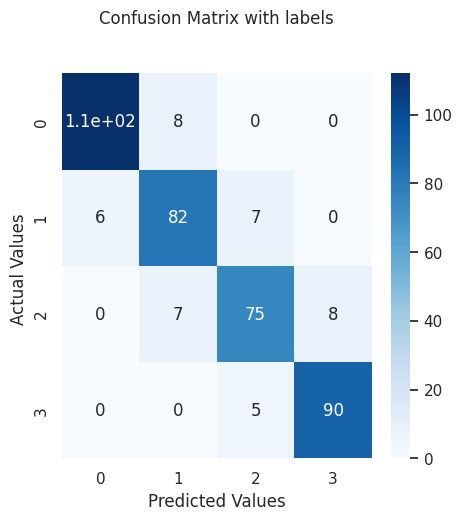

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       380
           1       0.90      0.90      0.90       405
           2       0.87      0.89      0.88       410
           3       0.94      0.93      0.94       405

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       120
           1       0.85      0.86      0.85        95
           2       0.86      0.83      0.85        90
           3       0.92      0.95      0.93        95

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

*   The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training  and test set.

*   Looking at the evaluation metric scores for training set, we can see that the model has an training accuracy of 91%, meaning that it correctly classified 91% of the instances in the training set. The precision for class 0 is 96%, meaning that when the model predicted a class 0 instance, it was correct 96% of the time. The recall for class 0 is 95%, meaning that the model correctly identified 95% of the actual class 0 instances in the dataset. The F1- score for class 0 is
96%.

*   Now,evaluation metric scores for test set, we can see that the model has an test accuracy of 89%, meaning that it correctly classified 89% of the instances in the training set. The precision for class 0 is 95%, meaning that when the model predicted a class 0 instance, it was correct 95% of the time. The recall for class 0 is 93%, meaning that the model correctly identified 93% of the actual class 0 instances in the dataset. The F1- score for class 0 is
94%.

*  Overall, the model seems to be performing reasonably well, with an accuracy of 91% on the training set and 89% in testing set.

####**Decision Tree Classifier**

In [ ]:
#Import library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=21)

# Fit the Algorithm
decision_tree_Classifier_model=dtr.fit(xtrain,ytrain)

# Predict on the model
pred_train_decision_tree=decision_tree_Classifier_model.predict(xtrain)
pred_test_decision_tree=decision_tree_Classifier_model.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_decision_tree)

1.0

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_decision_tree)

0.8125

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_decision_tree)
cf_matrix

array([[97, 23,  0,  0],
       [ 7, 72, 16,  0],
       [ 0,  6, 72, 12],
       [ 0,  0, 11, 84]])

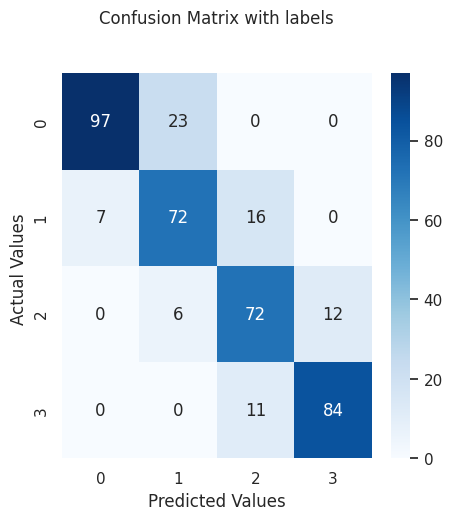

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_decision_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       405

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_decision_tree))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87       120
           1       0.71      0.76      0.73        95
           2       0.73      0.80      0.76        90
           3       0.88      0.88      0.88        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.





*   The ML model used is a Decision Tree Classifier model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*   Train set accuracy is 100% and test accuracy is 81.25%.


*   Model is overfitted on train set and did not generalised well.

*   We will tune hyperparamters to reduce overfitting and try to imporve the model performance.






####**Decision Tree Classifier with Hyperparameter Tuning**

In [ ]:
#Import library for Decision Tree Regression.
from sklearn.tree import DecisionTreeClassifier
dtc_hyper=DecisionTreeClassifier(random_state=21)

# Import library for GridSearch CV.
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {'max_depth':list(range(1,31,1))}
cv = GridSearchCV(dtc_hyper, param_grid = grid_values, scoring = 'accuracy', cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 6}

In [ ]:
# Fit the Algorithm
dtc_hyper=DecisionTreeClassifier(max_depth=6)

# Fit the Algorithm
dtc_hyper_model=dtc_hyper.fit(xtrain,ytrain)

# Predict on the model
pred_train_dtc_hyper=dtc_hyper_model.predict(xtrain)
pred_test_dtc_hyper=dtc_hyper_model.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_dtc_hyper)

0.9125

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_dtc_hyper)

0.8425

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_dtc_hyper)
cf_matrix

array([[103,  17,   0,   0],
       [  7,  75,  13,   0],
       [  0,   5,  74,  11],
       [  0,   0,  10,  85]])

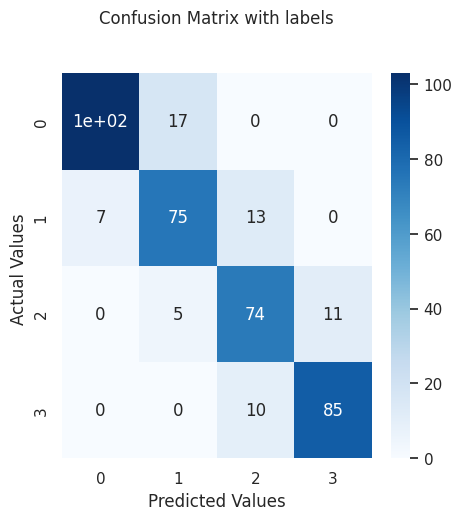

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_dtc_hyper))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       380
           1       0.88      0.88      0.88       405
           2       0.87      0.87      0.87       410
           3       0.95      0.94      0.95       405

    accuracy                           0.91      1600
   macro avg       0.91      0.91      0.91      1600
weighted avg       0.91      0.91      0.91      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_dtc_hyper))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       120
           1       0.77      0.79      0.78        95
           2       0.76      0.82      0.79        90
           3       0.89      0.89      0.89        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The accuracy has reduce from 100% to 91%, and the weighted average F1-score has also increased from 90% to 84% in test set. The precision and recall scores have also slightly improved for all class. Overall, the model has shown a slight improvement in its performance.

Observation:


*   The ML model used is a Decision Tree Hyperparameter Tuning model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.


*   Train accuarcy has been reduced to 91% from 100% and test accuarcy is 84% from 81%. Thus we somewhat reduced the overfiiting by reducing the training accuarcy.

*   In Decision Tree Hyperparameter Tuning the F1_score of class 0 and 3 are 90% and 89%, which is beter then other class value.



### ML Model - 2

####**K Nearest Neighbors**

In [ ]:
#Import library for Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

# Fit the Algorithm
model_knn=knn.fit(xtrain,ytrain)

# Predict on the model
pred_train_knn=model_knn.predict(xtrain)
pred_test_knn=model_knn.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_knn)

0.733125

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_knn)

0.5875

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_knn)
cf_matrix

array([[90, 27,  3,  0],
       [28, 45, 22,  0],
       [ 2, 32, 41, 15],
       [ 0,  8, 28, 59]])

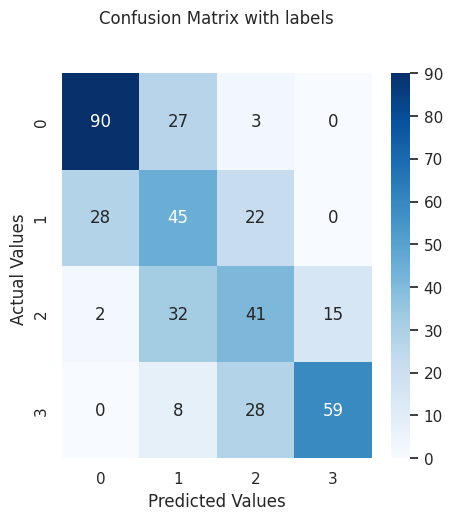

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_knn))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       380
           1       0.62      0.64      0.63       405
           2       0.68      0.68      0.68       410
           3       0.90      0.77      0.83       405

    accuracy                           0.73      1600
   macro avg       0.74      0.74      0.74      1600
weighted avg       0.74      0.73      0.73      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_knn))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       120
           1       0.40      0.47      0.43        95
           2       0.44      0.46      0.45        90
           3       0.80      0.62      0.70        95

    accuracy                           0.59       400
   macro avg       0.60      0.58      0.58       400
weighted avg       0.61      0.59      0.59       400




#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   The ML model used is a K Nearest Neighbors model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*   Train set accuracy is 73% and test accuracy is 58%.

*   Model is overfitted on train set and did not generalised well.
*   We will tune hyperparamters to reduce overfitting and try to imporve the model performance.






####**K Nearest Neighbors with Hyperparameter Tuning**

In [ ]:
#Import library for Decision Tree Regression.
from sklearn.neighbors import KNeighborsClassifier
knn_hyper=KNeighborsClassifier()

# Import library for GridSearch CV.
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {"n_neighbors":list(range(1,31))}
cv = GridSearchCV(knn_hyper, param_grid = grid_values, scoring = 'accuracy', cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'n_neighbors': 26}

In [ ]:
# Fit the Algorithm
knn_hyper=KNeighborsClassifier(n_neighbors=26)

# Fit the Algorithm
knn_hyper_model=knn_hyper.fit(xtrain,ytrain)

# Predict on the model
pred_train_knn_hyper=knn_hyper_model.predict(xtrain)
pred_test_knn_hyper=knn_hyper_model.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_knn_hyper)

0.696875

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_knn_hyper)

0.635

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_knn_hyper)
cf_matrix

array([[95, 23,  2,  0],
       [21, 42, 31,  1],
       [ 0, 23, 51, 16],
       [ 0,  0, 29, 66]])

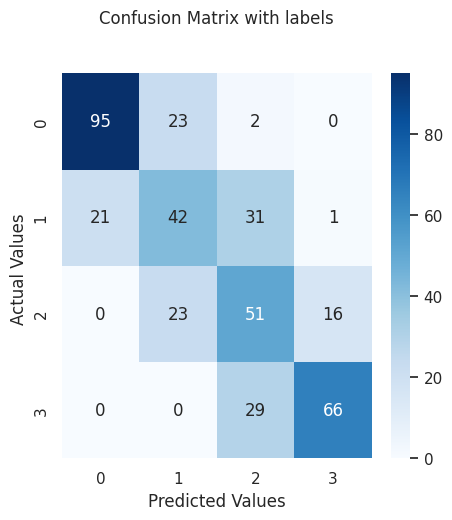

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_knn_hyper))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       380
           1       0.60      0.60      0.60       405
           2       0.59      0.65      0.62       410
           3       0.84      0.72      0.77       405

    accuracy                           0.70      1600
   macro avg       0.71      0.70      0.70      1600
weighted avg       0.70      0.70      0.70      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_knn_hyper))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       120
           1       0.48      0.44      0.46        95
           2       0.45      0.57      0.50        90
           3       0.80      0.69      0.74        95

    accuracy                           0.64       400
   macro avg       0.64      0.62      0.63       400
weighted avg       0.65      0.64      0.64       400



#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The trainingn accuracy has reduce from 73% to 69% but the test accuracy increse 58% to 63%, also we reduce the overfitting problem by reducibg the training accuracy , and the weighted average F1-score has also increased. The precision and recall scores have also slightly improved for all classes . However, the macro average precision and recall scores also increse to 65%. Overall, the model has shown a slight improvement in its performance.

Observations:

Before hyperparameters tuning:


*   Train Accuracy:73 %

*   Test Accuarcy:58 %

Clearly Model has performed very worst. We did hyperparameter tuning.


---



After Hyperparameter Tuning:


*   Train Accuarcy: 69%
*   Test Accuarcy: 63%

Surely we improved the model perfromance and reduced overfitting but however this is not good model for us. hear in testing set F1_score of class 0 is highest with 81%.












####**SVM(Support Vector Machine)**

In [ ]:
# import the libraries

from sklearn.svm import SVC
svc=SVC(random_state=21)
model_svm=svc.fit(xtrain,ytrain)

In [ ]:
#Import library for SVM
from sklearn.svm import SVC
svc=SVC(random_state=21)

# Fit the Algorithm
model_svm=svc.fit(xtrain,ytrain)

# Predict on the model
pred_train_svm=model_svm.predict(xtrain)
pred_test_svm=model_svm.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,y_pred_train)

0.918125

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_svm)

0.885

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_svm)
cf_matrix

array([[113,   7,   0,   0],
       [  8,  77,  10,   0],
       [  0,   7,  75,   8],
       [  0,   0,   6,  89]])

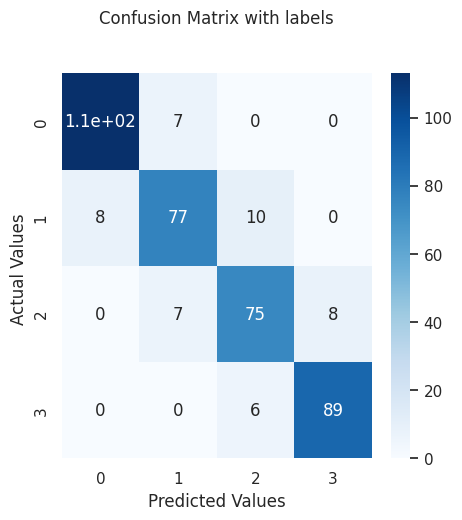

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_svm))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       380
           1       0.90      0.91      0.90       405
           2       0.87      0.91      0.89       410
           3       0.97      0.92      0.94       405

    accuracy                           0.92      1600
   macro avg       0.93      0.92      0.92      1600
weighted avg       0.93      0.92      0.92      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_svm))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       120
           1       0.85      0.81      0.83        95
           2       0.82      0.83      0.83        90
           3       0.92      0.94      0.93        95

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.89      0.88       400




#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   The ML model used is a SVM(Support Vector Machine) model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.


*   Looking at the evaluation metric scores for training set, we can see that the model has an training accuracy of 91%, meaning that it correctly classified 91% of the instances in the training set. The precision for class 0 is 97%, meaning that when the model predicted a class 0 instance, it was correct 97% of the time. The recall for class 0 is 96%, meaning that the model correctly identified 96% of the actual class 0 instances in the dataset. The F1- score for class 0 is 96%.
*   Now,evaluation metric scores for test set, we can see that the model has an test accuracy of 88%, meaning that it correctly classified 88% of the instances in the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 94%, meaning that the model correctly identified 94% of the actual class 0 instances in the dataset. The F1- score for class 0 is 94%.

*   Overall, the model seems to be performing reasonably well, with an accuracy of 91% on the training set and 88% in testing set.

*   But we will try to improve the model by applying Hyperparameter tuning.













####**SVM(Support Vector Machine) with Hyperparameter Tuning**

In [ ]:
#Import library for Decision Tree Regression.
from sklearn.svm import SVC
svc_hyper=SVC(random_state=21)

# Import library for GridSearch CV.
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {"C":range(1,30,1), "kernel":["linear","ploy","rbf","sigmoid"]}
cv = GridSearchCV(svc_hyper, param_grid = grid_values, scoring = 'accuracy', cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'C': 28, 'kernel': 'linear'}

In [ ]:
# Fit the Algorithm
svc_hyper=SVC(C=28,kernel="linear",random_state=21)

# Fit the Algorithm
model_svc_hyper=svc_hyper.fit(xtrain,ytrain)

# Predict on the model
pred_train_svc_hyper=model_svc_hyper.predict(xtrain)
pred_test_svc_hyper=model_svc_hyper.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_svc_hyper)

0.9225

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_svc_hyper)

0.9025

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_svc_hyper)
cf_matrix

array([[113,   7,   0,   0],
       [  7,  81,   7,   0],
       [  0,   5,  77,   8],
       [  0,   0,   5,  90]])

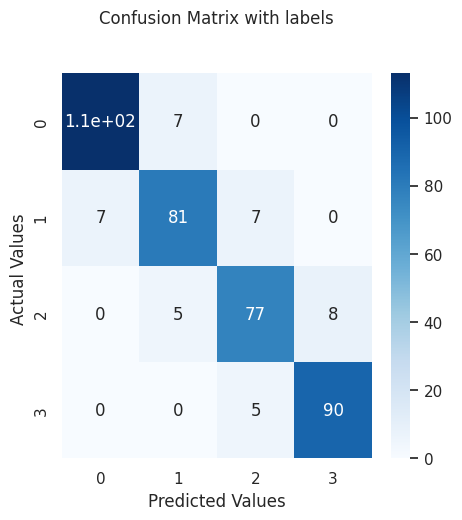

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_svc_hyper))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       380
           1       0.90      0.92      0.91       405
           2       0.89      0.88      0.88       410
           3       0.94      0.94      0.94       405

    accuracy                           0.92      1600
   macro avg       0.92      0.92      0.92      1600
weighted avg       0.92      0.92      0.92      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_svc_hyper))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       120
           1       0.87      0.85      0.86        95
           2       0.87      0.86      0.86        90
           3       0.92      0.95      0.93        95

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.


#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The training accuracy has increased from 91% to 92%, and the weighted average of F1-score and precision has also increased from 88% to 90% and recall 89% to 90% in test set. The precision and recall scores have also slightly improved for all classes. However, the macro average precision, recall and F1_score scores has improve form 88% to 90%. Overall, the model has shown a slight improvement in its performance..


*   After applying hyperparameter tuning in SVM(Support Vector Machine) model. The classification report shows the precision, recall, and F1-score for each class as compair to SVM model, as well as the support (number of instances) for each class in the training and test set.
*   Looking at the evaluation metric scores for training set, we can see that the model has an training accuracy of 92%, meaning that it correctly classified 92% of the instances in the training set. The precision for class 0 is 97%, meaning that when the model predicted a class 0 instance, it was correct 97% of the time. The recall for class 0 is 96%, meaning that the model correctly identified 96% of the actual class 0 instances in the dataset. The F1- score for class 0 is 96%.
*   Now,evaluation metric scores for test set, we can see that the model has an test accuracy of 90%, meaning that it correctly classified 94% of the instances in the training set. The precision for class 0 is 94%, meaning that when the model predicted a class 0 instance, it was correct 94% of the time. The recall for class 0 is 94%, meaning that the model correctly identified 94% of the actual class 0 instances in the dataset. The F1- score for class 0 is 94%.


*   Overall, the model seems to be performing reasonably well, with an accuracy of 92% on the training set and 90% in testing set.





### ML Model - 3

####**Random Forest Classification**

In [ ]:
#Import library for LinearRegression
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=21)

# Fit the Algorithm
rfc_model=rfc.fit(xtrain,ytrain)

# Predict on the model
pred_test_rfc=rfc_model.predict(xtest)
pred_train_rfc=rfc_model.predict(xtrain)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_rfc)

1.0

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_rfc)

0.86

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_rfc)
cf_matrix

array([[109,  11,   0,   0],
       [  7,  77,  11,   0],
       [  0,   9,  69,  12],
       [  0,   0,   6,  89]])

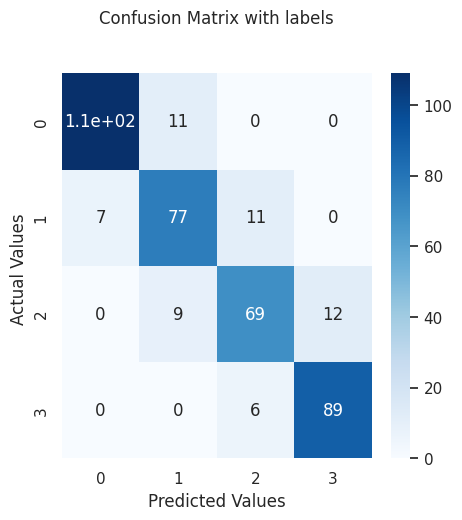

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       405

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_rfc))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       120
           1       0.79      0.81      0.80        95
           2       0.80      0.77      0.78        90
           3       0.88      0.94      0.91        95

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400



#####**Features Stored:**

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":rfc_model.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)

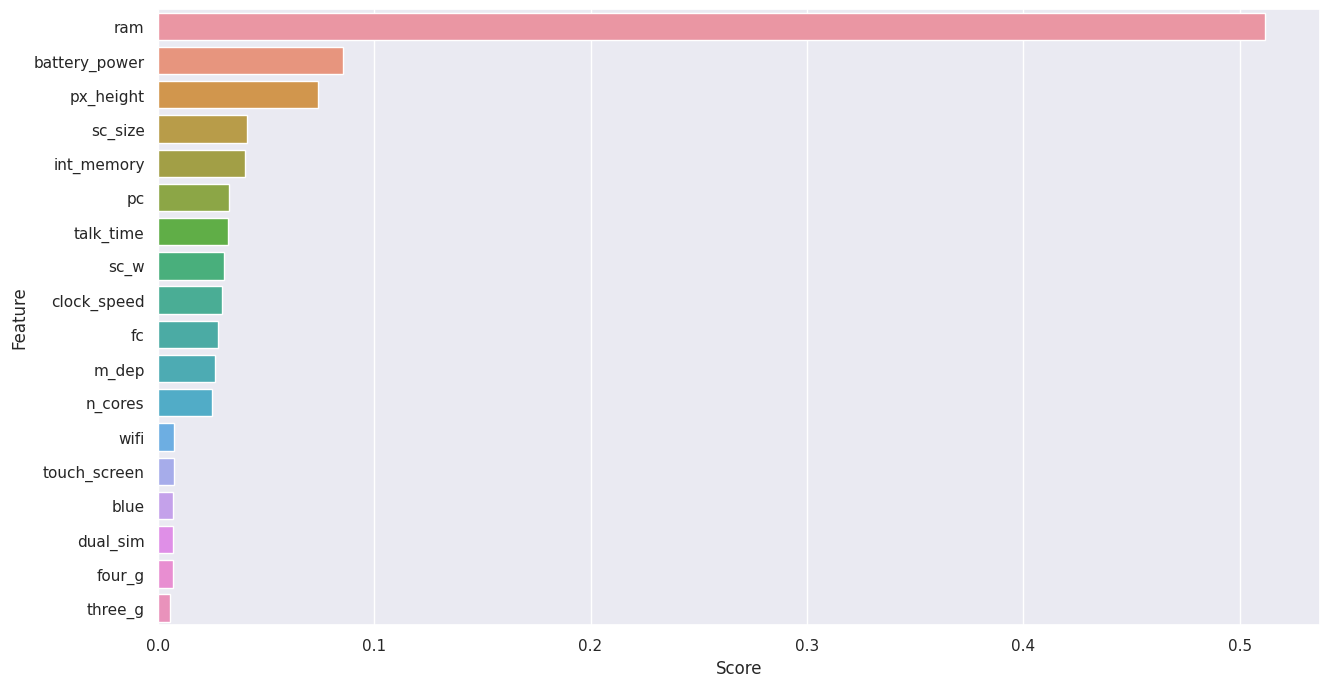

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])

#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



*   Train set accuracy is 100% and test accuracy is 86%.

*   Model is overfitted on train set and did not generalised well.
*   We will tune hyperparamters to reduce overfitting and try to imporve the model performance.






####**Random Forest Classification with Hyperparameter Tuning**

In [ ]:
#Import library for Ridge.
from sklearn.ensemble import RandomForestClassifier
rfc_hy=RandomForestClassifier(random_state=21)

# Import library for GridSearch CV.
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {'max_depth':list(range(1,5,1)), "min_samples_leaf":list(range(1,5,1)), "min_samples_split":list(range(1,5,1))}
cv = GridSearchCV(rfc_hy, param_grid = grid_values, scoring = 'accuracy', cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
#Import library for Ridge
from sklearn.ensemble import RandomForestClassifier

# Fit the Algorithm for Lasso
rfc_hy=RandomForestClassifier(max_depth=4 , min_samples_leaf= 1, min_samples_split= 4 ,random_state=21)
model_rfc_hy=rfc_hy.fit(xtrain,ytrain)

# Predict on the model
pred_train_rfc_hy=model_rfc_hy.predict(xtrain)
pred_test_rfc_hy=model_rfc_hy.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_rfc_hy)

0.865

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_rfc_hy)

0.82

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_rfc_hy)
cf_matrix

array([[110,  10,   0,   0],
       [ 12,  69,  14,   0],
       [  0,  14,  63,  13],
       [  0,   0,   9,  86]])

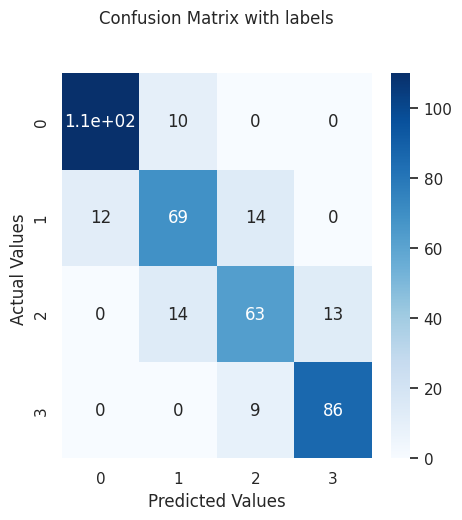

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_rfc_hy))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       380
           1       0.80      0.81      0.81       405
           2       0.81      0.76      0.78       410
           3       0.93      0.93      0.93       405

    accuracy                           0.86      1600
   macro avg       0.86      0.87      0.87      1600
weighted avg       0.86      0.86      0.86      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_rfc_hy))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       120
           1       0.74      0.73      0.73        95
           2       0.73      0.70      0.72        90
           3       0.87      0.91      0.89        95

    accuracy                           0.82       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



Features Stored:

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":model_rfc_hy.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.695432
1,battery_power,0.103808
2,px_height,0.062499
3,int_memory,0.020833
4,sc_size,0.019052


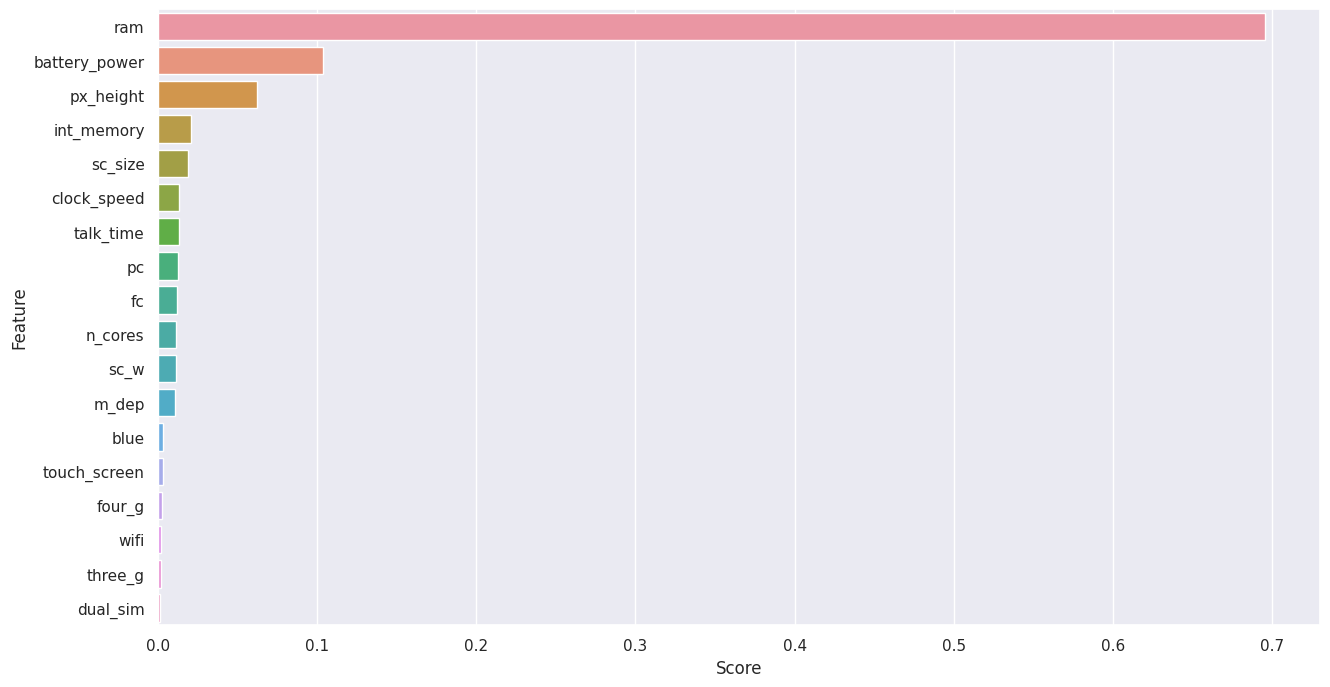

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])

#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance.

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is an improvement in the overall performance of the model. The model is not overfiiting we reduce the overfiiting by reducing the training and test accuarcy by applying hyperparameter tuning.

Observation:

*   Train accuarcy has been reduced to 86% from 100% and test accuarcy is 82% from 86%. we reduced the overfiiting by reducing the training accuarcy.

*   Looking at the evaluation metric scores for training set, we can see that the model has an training accuracy of 86%, meaning that it correctly classified 92% of the instances in the training set. The precision for class 0 is 92%, meaning that when the model predicted a class 0 instance, it was correct 92% of the time. The recall for class 0 is 97%, meaning that the model correctly identified 97% of the actual class 0 instances in the dataset. The F1- score for class 0 is 94%.


*   Now,evaluation metric scores for test set, we can see that the model has an test accuracy of 82%, meaning that it correctly classified 94% of the instances in the training set. The precision for class 0 is 90%, meaning that when the model predicted a class 0 instance, it was correct 90% of the time. The recall for class 0 is 92%, meaning that the model correctly identified 92% of the actual class 0 instances in the dataset. The F1- score for class 0 is 91%.

*   Overall, the model seems to be performing reasonably well, with an accuracy of 86% on the training set and 82% in testing set.

*   Here in Features Stored RAM play the very important rool the RAM weitage is 69% alone and after that battery_power 10%.






####**Gradient Boosting Classification**

In [ ]:
#Import library for LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

# Fit the Algorithm
gbc_model=gbc.fit(xtrain,ytrain)

# Predict on the model
pred_train_gbc=gbc_model.predict(xtrain)
pred_test_gbc=gbc_model.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_gbc)

0.99

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_gbc)

0.8825

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_gbc)
cf_matrix

array([[108,  12,   0,   0],
       [  5,  82,   8,   0],
       [  0,   5,  75,  10],
       [  0,   0,   7,  88]])

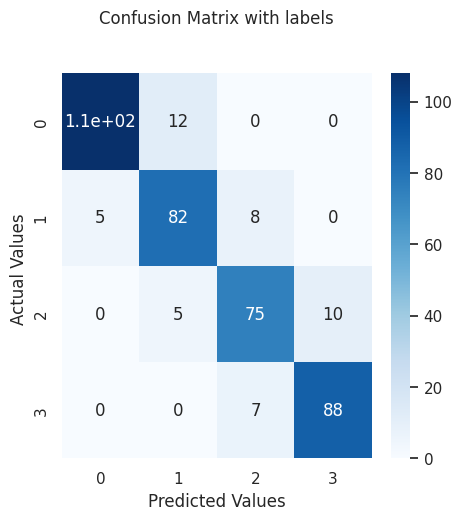

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_gbc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       380
           1       0.99      0.99      0.99       405
           2       0.98      0.99      0.98       410
           3       1.00      0.99      0.99       405

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_gbc))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       120
           1       0.83      0.86      0.85        95
           2       0.83      0.83      0.83        90
           3       0.90      0.93      0.91        95

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



Features Stored:

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":gbc_model.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.792814
1,battery_power,0.114631
2,px_height,0.067011
3,int_memory,0.007013
4,sc_size,0.005689


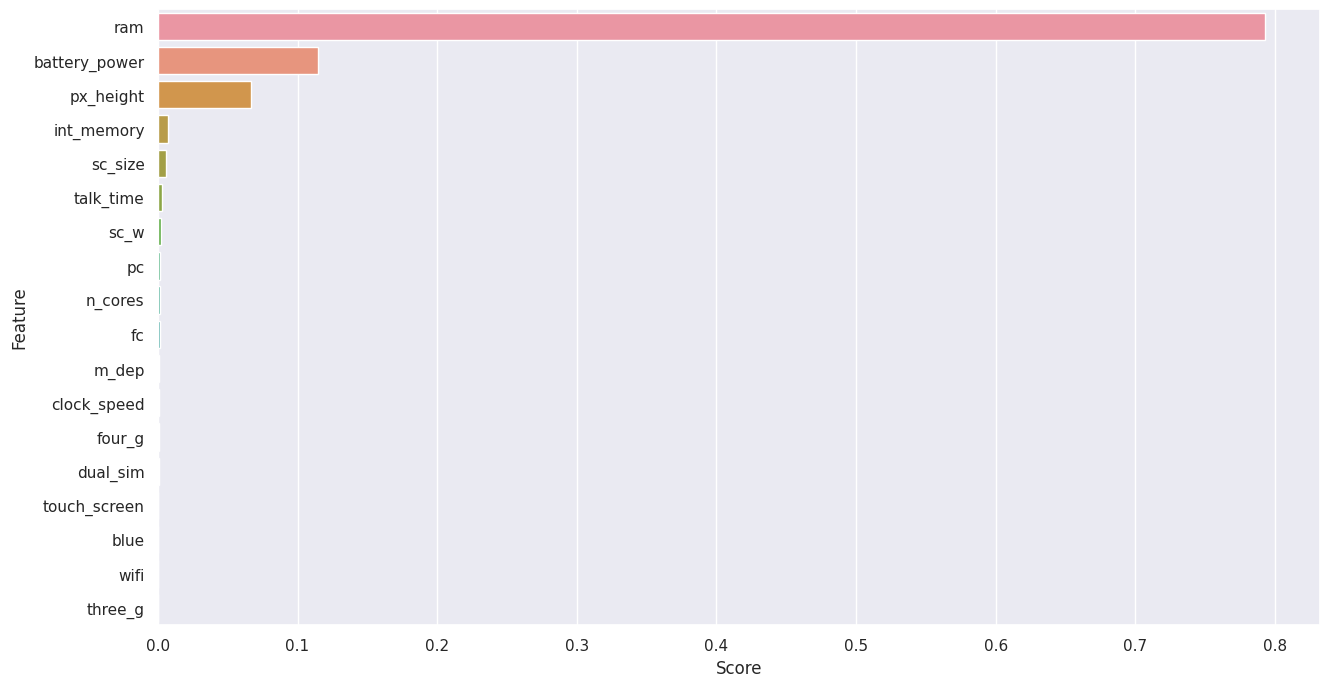

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])

#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Observation:


*   The ML model used is a Gradient Boosting Classification model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*  Train set accuracy is 100% and test accuracy is 81.25%.

*   Model is overfitted on train set and did not generalised well.

*   We will tune hyperparamters to reduce overfitting and try to imporve the model performance.



####**Gradient Boosting Classification with Hyperparameter Tuning**

In [ ]:
#import the pakages.
from sklearn.ensemble import GradientBoostingClassifier
gbc_hy=GradientBoostingClassifier()

# Import library for GridSearch CV.
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {'n_estimators':[90,100,110], 'max_depth':[7,8,9]}
cv = GridSearchCV(gbc_hy, param_grid = grid_values, scoring = 'accuracy', cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval

{'max_depth': 8, 'n_estimators': 100}

In [ ]:
#Import library for LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
gbc_hy=GradientBoostingClassifier(max_depth= 8, n_estimators= 100)

# Fit the Algorithm
gbc_hy_model=gbc_hy.fit(xtrain,ytrain)

# Predict on the model
pred_test_gbc_hy=gbc_hy_model.predict(xtest)
pred_train_gbc_hy=gbc_hy_model.predict(xtrain)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_gbc_hy)

1.0

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_gbc_hy)

0.8875

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_gbc_hy)
cf_matrix

array([[111,   9,   0,   0],
       [  5,  83,   7,   0],
       [  0,   7,  73,  10],
       [  0,   0,   7,  88]])

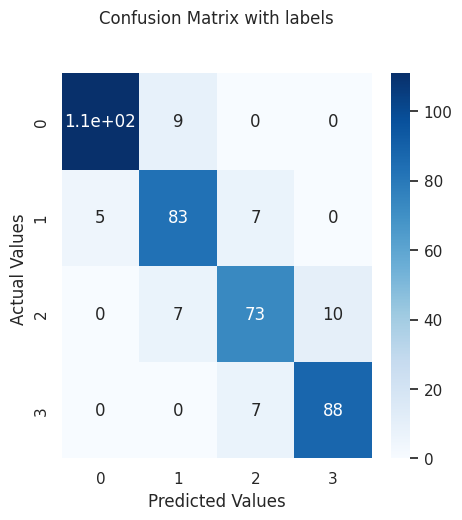

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_gbc_hy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       405

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_gbc_hy))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       120
           1       0.84      0.87      0.86        95
           2       0.84      0.81      0.82        90
           3       0.90      0.93      0.91        95

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



Features Stored:

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":gbc_hy_model.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.621765
1,battery_power,0.150821
2,px_height,0.129842
3,int_memory,0.017873
4,pc,0.014229


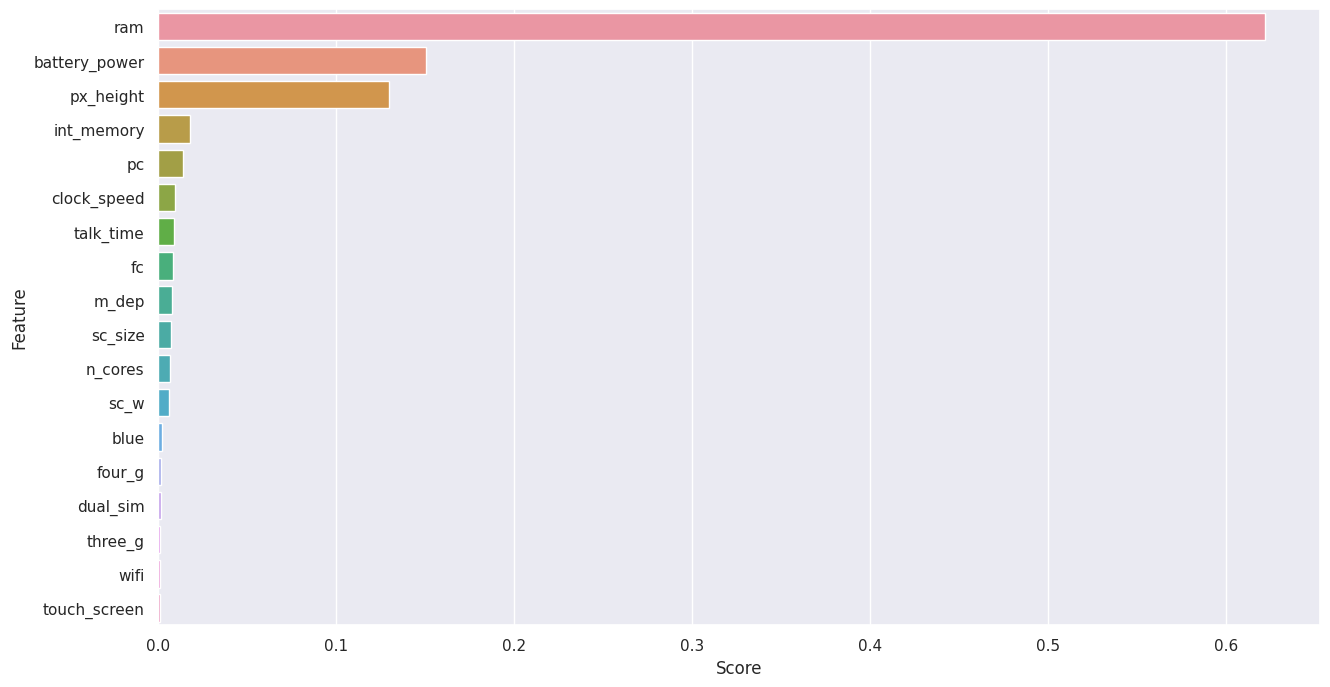

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])


#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is not improvement in the overall performance of the model. The training accuracy has increased from 99% to 100%, and the model is more overfitted.

Observaion:


*   The ML model used is a Gradient Boosting Hyperparameter Tuning model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*   Train set accuracy is 100% and test accuracy is 88%.

*   Model is overfitted on train set and did not generalised well.

*   In both tha model (Gradient Boosting and Gradient Boosting Hyperparameter) Ram play the very important rool in Feature importance.



####**XGBoost Classification**

In [ ]:
#import the pakages
from xgboost import XGBClassifier
xgb=XGBClassifier()

# Fit the Algorithm
xgb_model=xgb.fit(xtrain,ytrain)

# Predict on the model
pred_test_xgb=xgb_model.predict(xtest)
pred_train_xgb=xgb_model.predict(xtrain)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_xgb)

1.0

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_xgb)

0.8925

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_xgb)
cf_matrix

array([[110,  10,   0,   0],
       [  4,  84,   7,   0],
       [  0,   7,  73,  10],
       [  0,   0,   5,  90]])

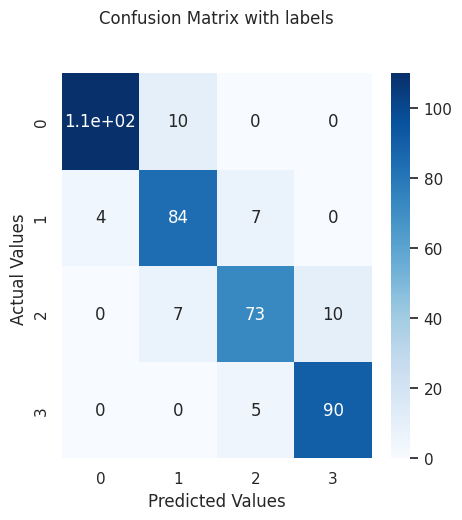

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       405

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       120
           1       0.83      0.88      0.86        95
           2       0.86      0.81      0.83        90
           3       0.90      0.95      0.92        95

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Features Stored:

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":xgb_model.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.440176
1,battery_power,0.135361
2,px_height,0.100338
3,m_dep,0.030847
4,pc,0.027674


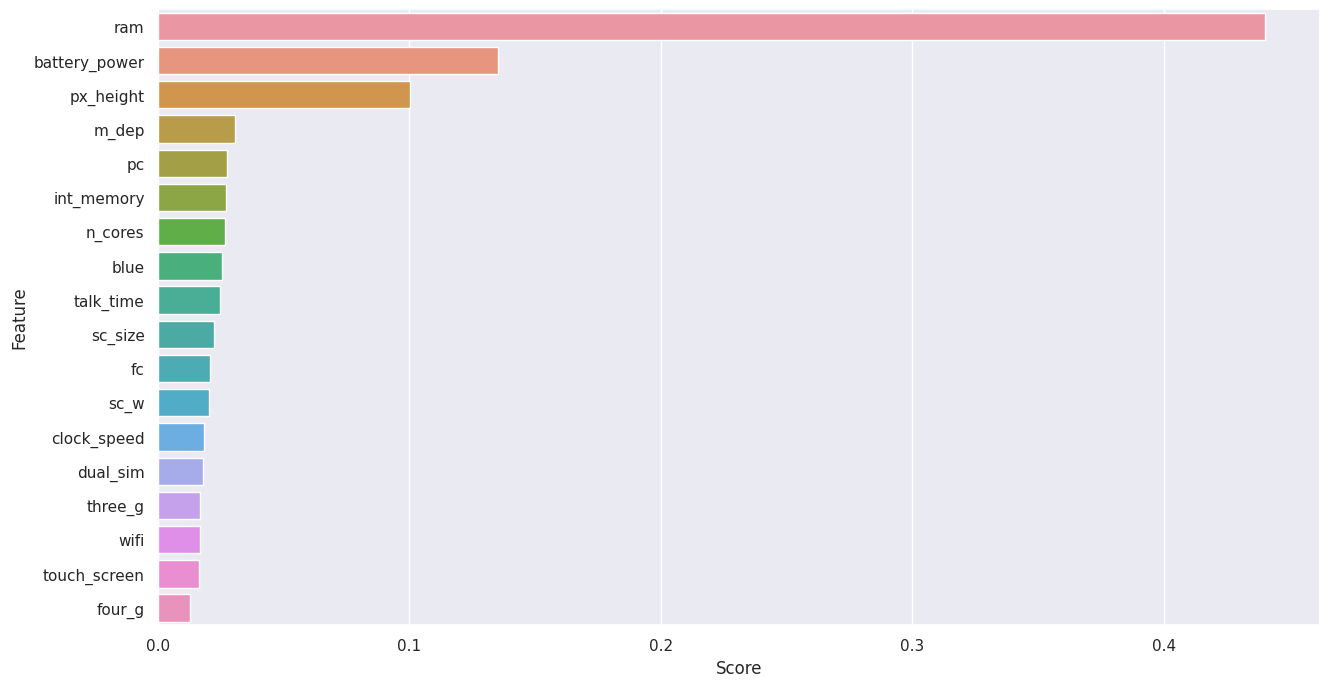

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])

#####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Observations:



*   The ML model used is a XGBoost Classification model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*   Train set accuracy is 100% and test accuracy is 89%.

*   Model is overfitted on train set and did not generalised well.

*   We will tune hyperparamters to reduce overfitting and try to imporve the model performance.







####**XGBoost Classification with Hyperparameter Tuning**

In [ ]:
#import the pakages
from xgboost import XGBClassifier
xgb_hy=XGBClassifier()

# Import library for GridSearch CV
from sklearn.model_selection import GridSearchCV

# Apllying hyperparameter tuning.
grid_values = {'n_estimators':[100,200,300], 'max_depth':[12,15,20]}
cv = GridSearchCV(xgb_hy, param_grid = grid_values, scoring = "accuracy", cv=5)
cvmodel = cv.fit(xtrain,ytrain)
bestval =cvmodel.best_params_
bestval


{'max_depth': 15, 'n_estimators': 200}

In [ ]:
# Fit the Algorithm for XGBoost Regression with Hyperparameter tuning
xgb_hy=XGBClassifier(max_depth= 15, n_estimators= 200)
xgb_hy_model=xgb_hy.fit(xtrain,ytrain)

# Predict on the model
pred_train_xgb_hy=xgb_hy_model.predict(xtrain)
pred_test_xgb_hy=xgb_hy_model.predict(xtest)

In [ ]:
# Checking training set accuracy.
accuracy_score(ytrain,pred_train_xgb_hy)

1.0

In [ ]:
# Checking test set accuracy.
accuracy_score(ytest,pred_test_xgb_hy)

0.8825

In [ ]:
# Confusion matrix for test set.
cf_matrix=confusion_matrix(ytest,pred_test_xgb_hy)
cf_matrix

array([[111,   9,   0,   0],
       [  6,  79,  10,   0],
       [  0,   6,  74,  10],
       [  0,   0,   6,  89]])

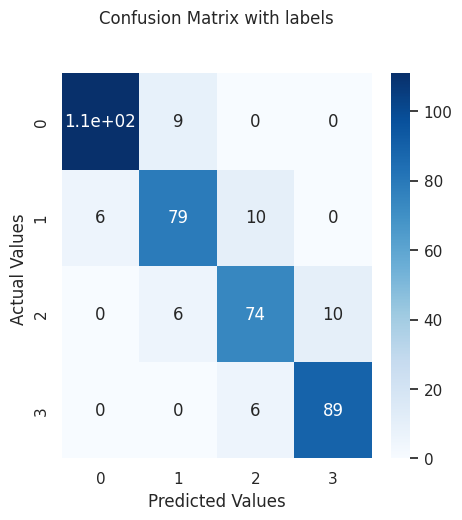

In [ ]:
# plotting confusion matrix for test set.
ax = sb.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel("Predicted Values")

ax.set_ylabel('Actual Values ')

# Ticket labels List must be in alphabetical order

ax.xaxis.set_ticklabels ([0,1,2,3])
ax.yaxis.set_ticklabels ([0,1,2,3])

# Display the visualization of the Confusion Matrix.

plt.show()

In [ ]:
# Printing classification_report for training set.
print(classification_report(ytrain,pred_train_xgb_hy))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       380
           1       1.00      1.00      1.00       405
           2       1.00      1.00      1.00       410
           3       1.00      1.00      1.00       405

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
# Printing classification_report for test set.
print(classification_report(ytest,pred_test_xgb_hy))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       120
           1       0.84      0.83      0.84        95
           2       0.82      0.82      0.82        90
           3       0.90      0.94      0.92        95

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



Features Stored:

In [ ]:
feature_importance=pd.DataFrame({"Feature":X.columns,
                                "Score":xgb_hy_model.feature_importances_}).sort_values(by="Score",ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.431366
1,battery_power,0.130346
2,px_height,0.098045
3,pc,0.033454
4,blue,0.032229


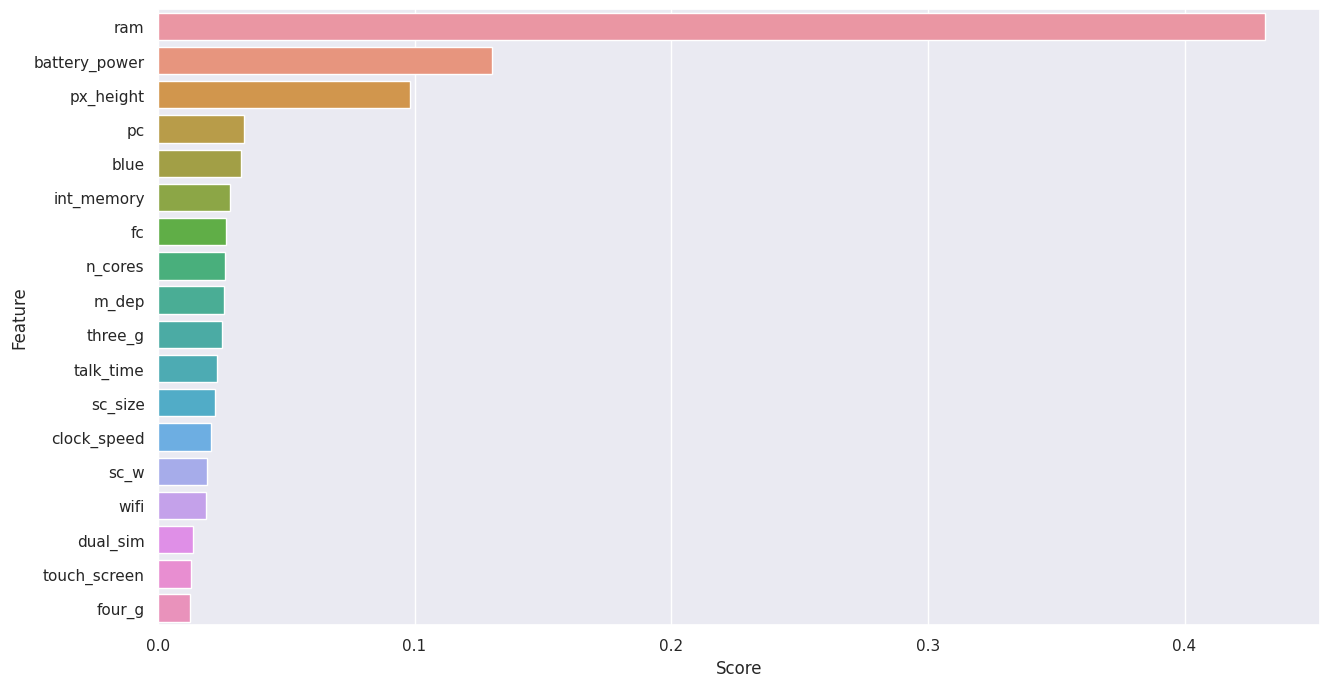

In [ ]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sb.barplot(x=feature_importance["Score"],y=feature_importance["Feature"])

#####1. Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique. GridSearchCV is a commonly used technique for hyperparameter tuning. It performs an exhaustive search over specified hyperparameter values for an estimator, and evaluates each combination using cross-validation. GridSearchCV helps to automate the process of parameter tuning, and helps to find the best combination of hyperparameters for the model, which in turn can improve its performance..


#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is not improvement in the overall performance of the model. The training accuracy has increased from 99% to 100%, and the model is more overfitted.

Observations:


*   The ML model used is a XGBoost Hyperparameter Tuning model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training and test set.

*   Train set accuracy is 100% and test accuracy is 88%.

*   Model is overfitted on train set and did not generalised well.

*  In both tha model (XGBoost and XGBoost Hyperparameter) Ram and Battert_power play the very important rool in Feature importance.




### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Their is different evaluation matrix. The classification report shows precision, recall, and F1-score for each class separately, as well as for the weighted average and the macro average. Therefore, the evaluation metrics that you can consider for a positive business impact are:

*   Weighted average of precision, recall, and F1-score: This metric takes into account the class imbalance by weighting the metrics by the number of samples in each class. In the context of mobile price range prediction, the weighted average of precision, recall, and F1-score can help you evaluate the overall performance of the model, taking into account the importance of each class.

*   Macro average of precision, recall, and F1-score: This metric calculates the average of precision, recall, and F1-score across all classes, without taking into account the class imbalance. In the context of mobile price range prediction, the macro average of precision, recall, and F1-score can help you evaluate the performance of the model on each class separately and identify which classes are more difficult to predict.
*   Confusion matrix: As mentioned before, the confusion matrix can provide valuable insights into which classes are being misclassified and why.






### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have choose SVM(Support Vector Machine) with Hyperparameter Tuning because they predict better results than other classification models with the training accuracy 92% and test accuracy 90%.

And 2nd best model is Logistic Regression with the training accuracy 91% and test accuracy 89%.

# **Conclusion**

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power, and px_height are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that SVM(Support Vector Machine) with Hyperparameter Tuning and  Logistic Regression algorithms yielded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher- priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and px_height. Finally, we found that SVM(Support Vector Machine) with Hyperparameter Tuning and Logistic Regression algorithms, provide the best performance in predicting the price range of mobile phones.